In [ ]:
import zipfile
import os
import subprocess
from pathlib import Path

def diagnose_zip(zip_path):
    """Diagnosa masalah pada file ZIP"""
    print(f"🔍 Mendiagnosa: {zip_path}")
    print("-" * 50)

    # Cek apakah file ada
    if not os.path.exists(zip_path):
        print("❌ File tidak ditemukan!")
        return False

    # Cek ukuran file
    file_size = os.path.getsize(zip_path)
    print(f"📏 Ukuran file: {file_size:,} bytes ({file_size/1024/1024:.1f} MB)")

    # Cek apakah file kosong
    if file_size == 0:
        print("❌ File kosong!")
        return False

    # Test dengan zipfile
    print("\n🧪 Test dengan Python zipfile:")
    try:
        with zipfile.ZipFile(zip_path, 'r') as zf:
            # Test integrity
            bad_files = zf.testzip()
            if bad_files:
                print(f"❌ File rusak ditemukan: {bad_files}")
            else:
                print("✅ Test integrity: PASSED")

            # Coba baca info
            info_list = zf.infolist()
            print(f"✅ Jumlah file: {len(info_list)}")
            return True

    except zipfile.BadZipFile:
        print("❌ BadZipFile: File bukan ZIP yang valid")
    except Exception as e:
        print(f"❌ Error: {e}")

    return False

def try_alternative_extraction(zip_path, extract_to="./extracted/"):
    """Coba berbagai metode ekstraksi alternatif"""
    print(f"\n🔧 Mencoba metode alternatif untuk: {zip_path}")
    print("-" * 50)

    os.makedirs(extract_to, exist_ok=True)

    # Metode 1: Unzip command line
    print("1️⃣ Mencoba dengan unzip command...")
    try:
        result = subprocess.run(['unzip', '-o', zip_path, '-d', extract_to],
                              capture_output=True, text=True)
        if result.returncode == 0:
            print("✅ Berhasil dengan unzip!")
            return True
        else:
            print(f"❌ Unzip gagal: {result.stderr}")
    except Exception as e:
        print(f"❌ Error unzip: {e}")

    # Metode 2: 7zip
    print("\n2️⃣ Mencoba dengan 7zip...")
    try:
        result = subprocess.run(['7z', 'x', zip_path, f'-o{extract_to}', '-y'],
                              capture_output=True, text=True)
        if result.returncode == 0:
            print("✅ Berhasil dengan 7zip!")
            return True
        else:
            print(f"❌ 7zip gagal: {result.stderr}")
    except Exception as e:
        print(f"❌ Error 7zip: {e}")

    # Metode 3: Python zipfile dengan mode permissive
    print("\n3️⃣ Mencoba ekstraksi parsial...")
    try:
        with zipfile.ZipFile(zip_path, 'r') as zf:
            extracted_count = 0
            failed_count = 0

            for member in zf.infolist():
                try:
                    zf.extract(member, extract_to)
                    extracted_count += 1
                    if extracted_count % 100 == 0:
                        print(f"   📄 Extracted: {extracted_count} files...")
                except Exception as e:
                    failed_count += 1
                    if failed_count <= 5:  # Show first 5 errors only
                        print(f"   ⚠️  Gagal: {member.filename} - {e}")

            print(f"✅ Ekstraksi parsial selesai!")
            print(f"   📄 Berhasil: {extracted_count} file")
            print(f"   ❌ Gagal: {failed_count} file")

            if extracted_count > 0:
                return True

    except Exception as e:
        print(f"❌ Error ekstraksi parsial: {e}")

    return False

def install_tools():
    """Install tools yang dibutuhkan"""
    print("🔧 Menginstall tools ekstraksi...")

    # Install 7zip
    os.system("apt-get update -qq")
    os.system("apt-get install -y p7zip-full")

    print("✅ Tools terinstall!")

def fix_and_extract(zip_path, extract_to="./extracted/"):
    """Fungsi utama untuk memperbaiki dan ekstrak ZIP"""

    print("🏥 ZIP TROUBLESHOOTER & EXTRACTOR")
    print("=" * 60)

    # Step 1: Install tools
    install_tools()

    # Step 2: Diagnosa
    is_readable = diagnose_zip(zip_path)

    # Step 3: Coba ekstraksi alternatif
    if try_alternative_extraction(zip_path, extract_to):
        print(f"\n🎉 BERHASIL! File diekstrak ke: {os.path.abspath(extract_to)}")

        # Tampilkan hasil
        print(f"\n📂 Isi folder {extract_to}:")
        try:
            for root, dirs, files in os.walk(extract_to):
                level = root.replace(extract_to, '').count(os.sep)
                indent = '  ' * level
                print(f"{indent}📁 {os.path.basename(root)}/")

                sub_indent = '  ' * (level + 1)
                for file in files[:5]:  # Show first 5 files per folder
                    print(f"{sub_indent}📄 {file}")
                if len(files) > 5:
                    print(f"{sub_indent}... dan {len(files)-5} file lainnya")

                if level > 2:  # Limit depth
                    break

        except Exception as e:
            print(f"Error listing files: {e}")

        return True
    else:
        print("\n❌ SEMUA METODE GAGAL!")
        print("\n💡 Kemungkinan penyebab:")
        print("   • File ZIP rusak atau tidak lengkap")
        print("   • Download terputus")
        print("   • File terenkripsi dengan password")
        print("   • Format kompresi tidak didukung")

        print("\n🔄 Saran:")
        print("   • Coba download ulang file ZIP")
        print("   • Periksa apakah ada password")
        print("   • Gunakan format file lain jika tersedia")

        return False

# ===============================================
# JALANKAN TROUBLESHOOTER
# ===============================================

# Path file ZIP Anda
zip_file_path = "/content/archive (5).zip"

# Jalankan troubleshooter
fix_and_extract(zip_file_path)

🏥 ZIP TROUBLESHOOTER & EXTRACTOR
🔧 Menginstall tools ekstraksi...
✅ Tools terinstall!
🔍 Mendiagnosa: /content/archive (5).zip
--------------------------------------------------
📏 Ukuran file: 404,648,636 bytes (385.9 MB)

🧪 Test dengan Python zipfile:
❌ File rusak ditemukan: Dataset_BUSI_with_GT/benign/benign (1).png
✅ Jumlah file: 1578

🔧 Mencoba metode alternatif untuk: /content/archive (5).zip
--------------------------------------------------
1️⃣ Mencoba dengan unzip command...
❌ Unzip gagal: warning [/content/archive (5).zip]:  200227166 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  200227166
  (attempting to re-compensate)
error: not enough memory for bomb detection


2️⃣ Mencoba dengan 7zip...
❌ 7zip gagal: 
ERRORS:
Headers Error
Unconfirmed start of archive

ERROR: Data Error : Dataset_BUSI_with_GT/benign/benign (102).png


3️⃣ Mencoba ekstraksi parsial...
   ⚠️  Gagal: Dataset_BUSI_with_GT/benign/b

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 1260 images belonging to 3 classes.
Found 318 images belonging to 3 classes.

[INFO] Extracting features with ResNet50...
⚠️ Skipping batch 10 due to error: Truncated File Read

[INFO] Applying Linear Discriminant Analysis (LDA)...

[INFO] Training Decision Tree classifier...

💾 Model saved as 'decision_tree_model.pkl' and features saved as 'decision_tree_model.h5'

[INFO] Evaluating model...

✅ Accuracy: 80.50%

Classification Report:

              precision    recall  f1-score   support

         0.0       0.81      0.91      0.85       179
         1.0       0.80      0.60      0.68        85
         2.0       0.80      0.80      0.80        54

    accuracy                           0.81       318
   macro avg       0.80      0.77      0.78       318
weighted avg       0.80      0.81      0.80       318


Confusion Matrix:
[[162  13   4]
 [ 27  51   7]
 [ 11   0  43]]


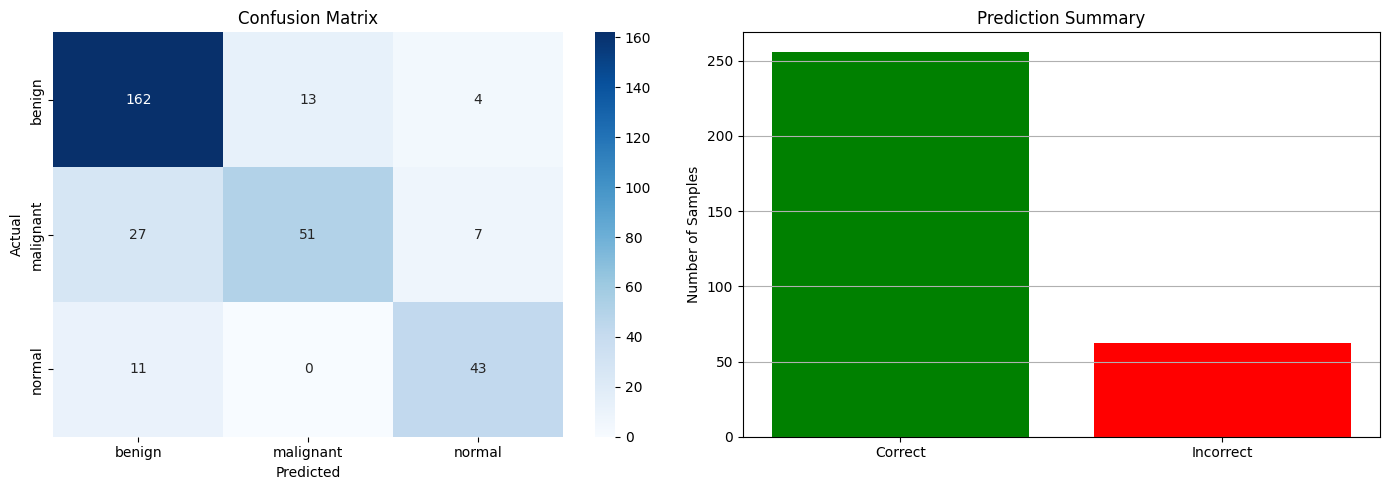

In [ ]:
import os
import shutil
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from PIL import ImageFile
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
import joblib
import h5py
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# Allow loading truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# === Step 0: Define path to already extracted dataset ===
src_dataset_path = "/content/extracted/Dataset_BUSI_with_GT"

# === Remove corrupted images before use ===
def remove_corrupted_images(directory):
    from PIL import UnidentifiedImageError
    count = 0
    for root, _, files in os.walk(directory):
        for fname in files:
            fpath = os.path.join(root, fname)
            try:
                with Image.open(fpath) as img:
                    img.load()
                    img.verify()
            except (OSError, UnidentifiedImageError):
                os.remove(fpath)
                count += 1
                print(f"❌ Removed corrupted: {fpath}")
    print(f"[INFO] Total corrupted images removed: {count}")

# === Prepare Train/Test Split with image verification ===
def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.load()
            img.verify()
        return True
    except Exception:
        return False

def prepare_dataset_structure(src_dir, dst_dir='dataset', split_ratio=0.2):
    classes = os.listdir(src_dir)
    total_images = 0
    for cls in classes:
        files = [f for f in Path(os.path.join(src_dir, cls)).glob('*.*') if is_valid_image(f)]
        total_images += len(files)
        train_files, test_files = train_test_split(files, test_size=split_ratio, random_state=42)

        for subset, file_list in zip(['train', 'test'], [train_files, test_files]):
            out_dir = Path(dst_dir) / subset / cls
            out_dir.mkdir(parents=True, exist_ok=True)
            for file in file_list:
                shutil.copy(file, out_dir / file.name)

    if total_images < 1200:
        raise ValueError(f"❌ Jumlah total gambar valid hanya {total_images}, harus minimal 1200 untuk lanjut.")
    else:
        print(f"✅ Jumlah total gambar valid: {total_images}")

if not os.path.exists("dataset/train"):
    prepare_dataset_structure(src_dataset_path)
    print("[INFO] Dataset has been split into train/test folders.")
    remove_corrupted_images("dataset/train")
    remove_corrupted_images("dataset/test")

# === Step 1: Load and Preprocess Images ===
image_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    'dataset/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    'dataset/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# === Step 2: Extract features with ResNet50 ===
print("\n[INFO] Extracting features with ResNet50...")
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def safe_extract_features(generator):
    features, labels = [], []
    for i in range(len(generator)):
        try:
            x_batch, y_batch = generator[i]
            f = base_model.predict(x_batch, verbose=0)
            features.append(f)
            labels.extend(y_batch)
        except Exception as e:
            print(f"⚠️ Skipping batch {i} due to error: {e}")
    return np.vstack(features), np.array(labels)

X_train_features, y_train = safe_extract_features(train_generator)
X_test_features, y_test = safe_extract_features(test_generator)

# === Step 3: LDA for Dimensionality Reduction ===
print("\n[INFO] Applying Linear Discriminant Analysis (LDA)...")
lda = LinearDiscriminantAnalysis(n_components=None)
X_train_lda = lda.fit_transform(X_train_features, y_train)
X_test_lda = lda.transform(X_test_features)

# === Step 4: Train Decision Tree Classifier ===
print("\n[INFO] Training Decision Tree classifier...")
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train_lda, y_train)

# Save classifier in HDF5 format (h5)
with h5py.File("decision_tree_model.h5", "w") as hf:
    hf.create_dataset("X_train_lda", data=X_train_lda)
    hf.create_dataset("y_train", data=y_train)
    hf.create_dataset("X_test_lda", data=X_test_lda)
    hf.create_dataset("y_test", data=y_test)
    hf.attrs['description'] = 'LDA-transformed features and labels for decision tree training'

# Save classifier as pkl
joblib.dump(clf, "decision_tree_model.pkl")
print("\n💾 Model saved as 'decision_tree_model.pkl' and features saved as 'decision_tree_model.h5'")

# === Step 5: Evaluation ===
print("\n[INFO] Evaluating model...")
y_pred = clf.predict(X_test_lda)

acc = accuracy_score(y_test, y_pred) * 100
print(f"\n✅ Accuracy: {acc:.2f}%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# === Step 6: Visualizations ===
# Accuracy and Classification Visuals
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.subplot(1, 2, 2)
correct = np.sum(y_test == y_pred)
incorrect = len(y_test) - correct
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title('Prediction Summary')
plt.ylabel('Number of Samples')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Found 1260 images belonging to 3 classes.
Found 318 images belonging to 3 classes.

[INFO] Extracting features with ResNet50...
⚠️ Skipping batch 33 due to error: Truncated File Read

[INFO] Applying Linear Discriminant Analysis (LDA)...

[INFO] Training XGBoost classifier...

💾 Model saved as 'xgboost_model.pkl' and features saved as 'xgboost_model.h5'

[INFO] Evaluating model...

✅ Accuracy: 77.67%

Classification Report:



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:17:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82       179
         1.0       0.71      0.74      0.72        85
         2.0       0.64      0.87      0.74        54

    accuracy                           0.78       318
   macro avg       0.74      0.79      0.76       318
weighted avg       0.79      0.78      0.78       318


Confusion Matrix:
[[137  25  17]
 [ 13  63   9]
 [  6   1  47]]


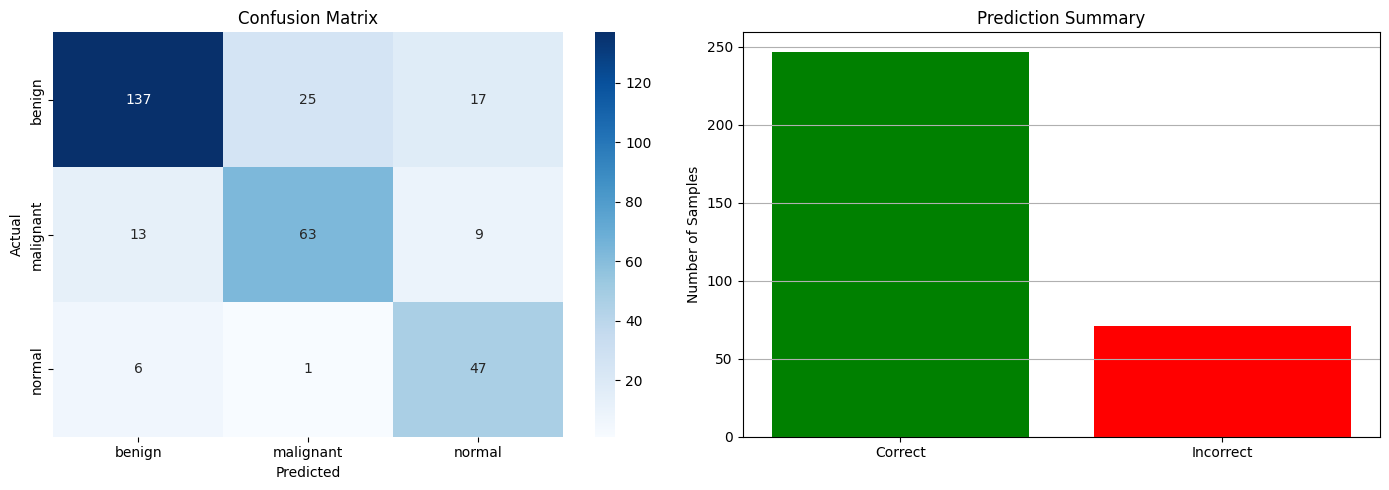

In [ ]:
import os
import shutil
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image
from PIL import ImageFile
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
import joblib
import h5py
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# Allow loading truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# === Step 0: Define path to already extracted dataset ===
src_dataset_path = "/content/extracted/Dataset_BUSI_with_GT"

# === Remove corrupted images before use ===
def remove_corrupted_images(directory):
    from PIL import UnidentifiedImageError
    count = 0
    for root, _, files in os.walk(directory):
        for fname in files:
            fpath = os.path.join(root, fname)
            try:
                with Image.open(fpath) as img:
                    img.load()
                    img.verify()
            except (OSError, UnidentifiedImageError):
                os.remove(fpath)
                count += 1
                print(f"❌ Removed corrupted: {fpath}")
    print(f"[INFO] Total corrupted images removed: {count}")

# === Prepare Train/Test Split with image verification ===
def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.load()
            img.verify()
        return True
    except Exception:
        return False

def prepare_dataset_structure(src_dir, dst_dir='dataset', split_ratio=0.2):
    classes = os.listdir(src_dir)
    total_images = 0
    for cls in classes:
        files = [f for f in Path(os.path.join(src_dir, cls)).glob('*.*') if is_valid_image(f)]
        total_images += len(files)
        train_files, test_files = train_test_split(files, test_size=split_ratio, random_state=42)

        for subset, file_list in zip(['train', 'test'], [train_files, test_files]):
            out_dir = Path(dst_dir) / subset / cls
            out_dir.mkdir(parents=True, exist_ok=True)
            for file in file_list:
                shutil.copy(file, out_dir / file.name)

    if total_images < 1200:
        raise ValueError(f"❌ Jumlah total gambar valid hanya {total_images}, harus minimal 1200 untuk lanjut.")
    else:
        print(f"✅ Jumlah total gambar valid: {total_images}")

if not os.path.exists("dataset/train"):
    prepare_dataset_structure(src_dataset_path)
    print("[INFO] Dataset has been split into train/test folders.")
    remove_corrupted_images("dataset/train")
    remove_corrupted_images("dataset/test")

# === Step 1: Load and Preprocess Images ===
image_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    'dataset/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    'dataset/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# === Step 2: Extract features with ResNet50 ===
print("\n[INFO] Extracting features with ResNet50...")
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def safe_extract_features(generator):
    features, labels = [], []
    for i in range(len(generator)):
        try:
            x_batch, y_batch = generator[i]
            f = base_model.predict(x_batch, verbose=0)
            features.append(f)
            labels.extend(y_batch)
        except Exception as e:
            print(f"⚠️ Skipping batch {i} due to error: {e}")
    return np.vstack(features), np.array(labels)

X_train_features, y_train = safe_extract_features(train_generator)
X_test_features, y_test = safe_extract_features(test_generator)

# === Step 3: LDA for Dimensionality Reduction ===
print("\n[INFO] Applying Linear Discriminant Analysis (LDA)...")
lda = LinearDiscriminantAnalysis(n_components=None)
X_train_lda = lda.fit_transform(X_train_features, y_train)
X_test_lda = lda.transform(X_test_features)

# === Step 4: Train XGBoost Classifier ===
print("\n[INFO] Training XGBoost classifier...")
clf = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss')
clf.fit(X_train_lda, y_train)

# Save classifier in HDF5 format (h5)
with h5py.File("xgboost_model.h5", "w") as hf:
    hf.create_dataset("X_train_lda", data=X_train_lda)
    hf.create_dataset("y_train", data=y_train)
    hf.create_dataset("X_test_lda", data=X_test_lda)
    hf.create_dataset("y_test", data=y_test)
    hf.attrs['description'] = 'LDA-transformed features and labels for XGBoost training'

# Save classifier as pkl
joblib.dump(clf, "xgboost_model.pkl")
print("\n💾 Model saved as 'xgboost_model.pkl' and features saved as 'xgboost_model.h5'")

# === Step 5: Evaluation ===
print("\n[INFO] Evaluating model...")
y_pred = clf.predict(X_test_lda)

acc = accuracy_score(y_test, y_pred) * 100
print(f"\n✅ Accuracy: {acc:.2f}%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# === Step 6: Visualizations ===
# Accuracy and Classification Visuals
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.subplot(1, 2, 2)
correct = np.sum(y_test == y_pred)
incorrect = len(y_test) - correct
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title('Prediction Summary')
plt.ylabel('Number of Samples')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Found 1260 images belonging to 3 classes.
Found 318 images belonging to 3 classes.

[INFO] Extracting features with ResNet50...
⚠️ Skipping batch 30 due to error: Truncated File Read

[INFO] Applying Linear Discriminant Analysis (LDA)...

[INFO] Training XGBoost classifier...
[0]	validation_0-mlogloss:1.03185
[1]	validation_0-mlogloss:0.97646
[2]	validation_0-mlogloss:0.92975
[3]	validation_0-mlogloss:0.88991
[4]	validation_0-mlogloss:0.85563
[5]	validation_0-mlogloss:0.82595
[6]	validation_0-mlogloss:0.80013
[7]	validation_0-mlogloss:0.77759
[8]	validation_0-mlogloss:0.75786
[9]	validation_0-mlogloss:0.74056
[10]	validation_0-mlogloss:0.72539
[11]	validation_0-mlogloss:0.71208
[12]	validation_0-mlogloss:0.70042
[13]	validation_0-mlogloss:0.69023
[14]	validation_0-mlogloss:0.68133
[15]	validation_0-mlogloss:0.67361
[16]	validation_0-mlogloss:0.66694
[17]	validation_0-mlogloss:0.66122
[18]	validation_0-mlogloss:0.65636
[19]	validation_0-mlogloss:0.65228
[20]	validation_0-mlogloss:0.6489

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:30:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[43]	validation_0-mlogloss:0.66421
[44]	validation_0-mlogloss:0.66405
[45]	validation_0-mlogloss:0.66314
[46]	validation_0-mlogloss:0.66264
[47]	validation_0-mlogloss:0.66252
[48]	validation_0-mlogloss:0.66273
[49]	validation_0-mlogloss:0.66324
[50]	validation_0-mlogloss:0.66402
[51]	validation_0-mlogloss:0.66504
[52]	validation_0-mlogloss:0.66628
[53]	validation_0-mlogloss:0.66772
[54]	validation_0-mlogloss:0.66932
[55]	validation_0-mlogloss:0.67108
[56]	validation_0-mlogloss:0.67297
[57]	validation_0-mlogloss:0.67497
[58]	validation_0-mlogloss:0.67707
[59]	validation_0-mlogloss:0.67926
[60]	validation_0-mlogloss:0.68144
[61]	validation_0-mlogloss:0.68364
[62]	validation_0-mlogloss:0.68584
[63]	validation_0-mlogloss:0.68805
[64]	validation_0-mlogloss:0.69108
[65]	validation_0-mlogloss:0.69404
[66]	validation_0-mlogloss:0.69695
[67]	validation_0-mlogloss:0.69979
[68]	validation_0-mlogloss:0.70257
[69]	validation_0-mlogloss:0.70529
[70]	validation_0-mlogloss:0.70795
[71]	validation_0-ml

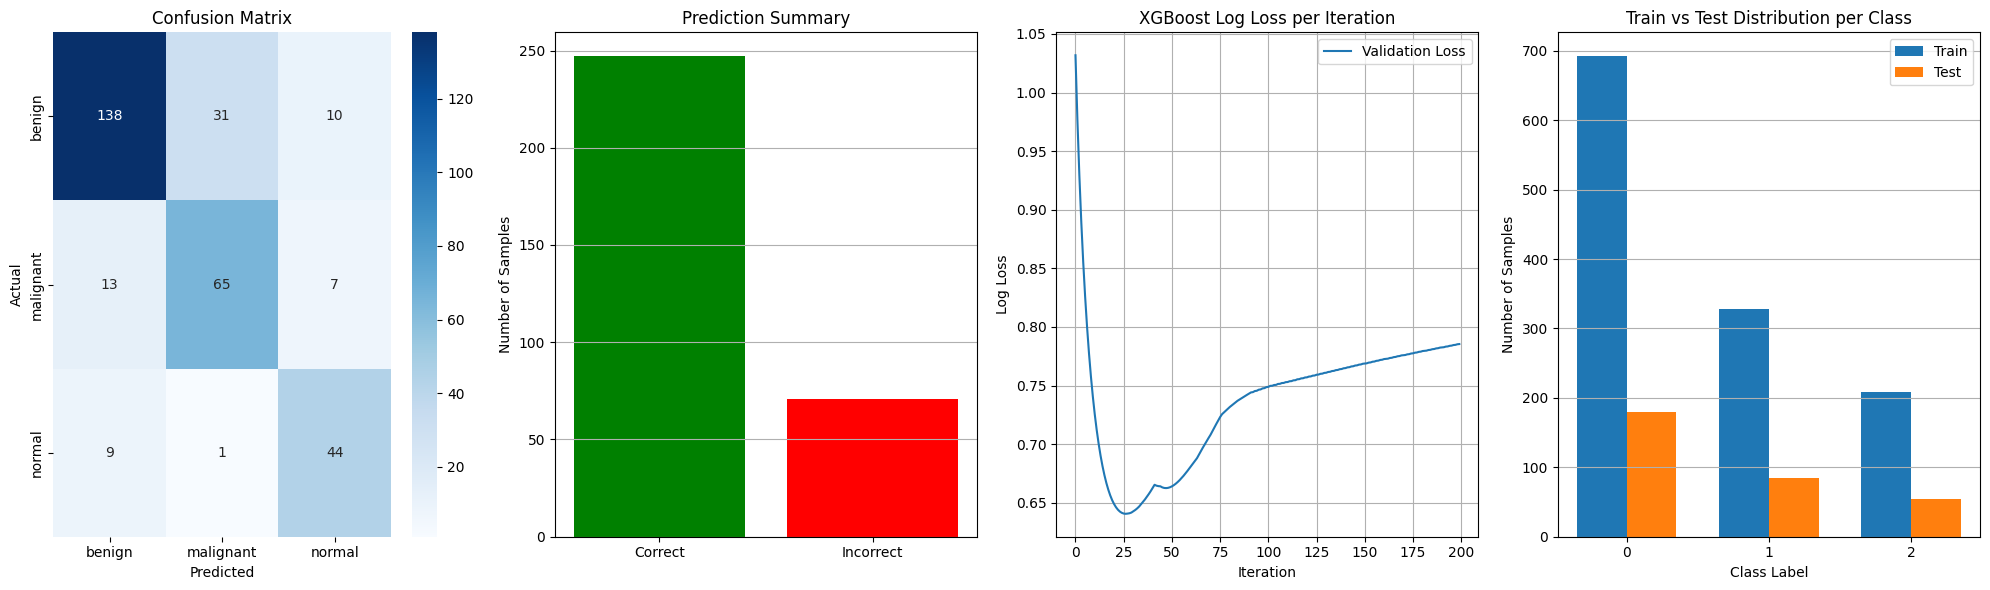

In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image, ImageFile
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
import joblib
import h5py
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

ImageFile.LOAD_TRUNCATED_IMAGES = True

src_dataset_path = "./Dataset_BUSI_with_GT"

def remove_corrupted_images(directory):
    from PIL import UnidentifiedImageError
    count = 0
    for root, _, files in os.walk(directory):
        for fname in files:
            fpath = os.path.join(root, fname)
            try:
                with Image.open(fpath) as img:
                    img.load()
                    img.verify()
            except (OSError, UnidentifiedImageError):
                os.remove(fpath)
                count += 1
                print(f"❌ Removed corrupted: {fpath}")
    print(f"[INFO] Total corrupted images removed: {count}")

def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.load()
            img.verify()
        return True
    except Exception:
        return False

def prepare_dataset_structure(src_dir, dst_dir='dataset', split_ratio=0.2):
    classes = os.listdir(src_dir)
    total_images = 0
    for cls in classes:
        files = [f for f in Path(os.path.join(src_dir, cls)).glob('*.*') if is_valid_image(f)]
        total_images += len(files)
        train_files, test_files = train_test_split(files, test_size=split_ratio, random_state=42)

        for subset, file_list in zip(['train', 'test'], [train_files, test_files]):
            out_dir = Path(dst_dir) / subset / cls
            out_dir.mkdir(parents=True, exist_ok=True)
            for file in file_list:
                shutil.copy(file, out_dir / file.name)

    if total_images < 1200:
        raise ValueError(f"❌ Jumlah total gambar valid hanya {total_images}, harus minimal 1200 untuk lanjut.")
    else:
        print(f"✅ Jumlah total gambar valid: {total_images}")

if not os.path.exists("dataset/train"):
    prepare_dataset_structure(src_dataset_path)
    print("[INFO] Dataset has been split into train/test folders.")
    remove_corrupted_images("dataset/train")
    remove_corrupted_images("dataset/test")

image_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    'dataset/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    'dataset/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

print("\n[INFO] Extracting features with ResNet50...")
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def safe_extract_features(generator):
    features, labels = [], []
    for i in range(len(generator)):
        try:
            x_batch, y_batch = generator[i]
            f = base_model.predict(x_batch, verbose=0)
            features.append(f)
            labels.extend(y_batch)
        except Exception as e:
            print(f"⚠️ Skipping batch {i} due to error: {e}")
    return np.vstack(features), np.array(labels)

X_train_features, y_train = safe_extract_features(train_generator)
X_test_features, y_test = safe_extract_features(test_generator)

print("\n[INFO] Applying Linear Discriminant Analysis (LDA)...")
lda = LinearDiscriminantAnalysis(n_components=None)
X_train_lda = lda.fit_transform(X_train_features, y_train)
X_test_lda = lda.transform(X_test_features)

print("\n[INFO] Training XGBoost classifier...")
clf = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', verbosity=1)
eval_result = clf.fit(X_train_lda, y_train, eval_set=[(X_test_lda, y_test)], verbose=True)

joblib.dump(clf, "xgboost_model.pkl")
joblib.dump(lda, "lda_model.pkl")
print("\n📌 Model saved as 'xgboost_model.pkl' and LDA saved as 'lda_model.pkl'")

with h5py.File("xgboost_model.h5", "w") as hf:
    hf.create_dataset("X_train_lda", data=X_train_lda)
    hf.create_dataset("y_train", data=y_train)
    hf.create_dataset("X_test_lda", data=X_test_lda)
    hf.create_dataset("y_test", data=y_test)
    hf.attrs['description'] = 'LDA-transformed features and labels for XGBoost training'

print("\n[INFO] Evaluating model...")
y_pred = clf.predict(X_test_lda)

acc = accuracy_score(y_test, y_pred) * 100
print(f"\n✅ Accuracy: {acc:.2f}%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.subplot(1, 4, 2)
correct = np.sum(y_test == y_pred)
incorrect = len(y_test) - correct
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title('Prediction Summary')
plt.ylabel('Number of Samples')
plt.grid(axis='y')

plt.subplot(1, 4, 3)
xgb_eval = clf.evals_result()
plt.plot(xgb_eval['validation_0']['mlogloss'], label='Validation Loss')
plt.title('XGBoost Log Loss per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 4, 4)
labels = np.unique(np.concatenate([y_train, y_test]))
train_counts = [np.sum(y_train == label) for label in labels]
test_counts = [np.sum(y_test == label) for label in labels]
bar_width = 0.35
index = np.arange(len(labels))
plt.bar(index, train_counts, bar_width, label='Train')
plt.bar(index + bar_width, test_counts, bar_width, label='Test')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Train vs Test Distribution per Class')
plt.xticks(index + bar_width / 2, [str(int(l)) for l in labels])
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Found 1260 images belonging to 3 classes.
Found 318 images belonging to 3 classes.

[INFO] Extracting features with ResNet50...
⚠️ Skipping batch 4 due to error: Truncated File Read

[INFO] Training XGBoost classifier without LDA...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:11:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:0.99969
[1]	validation_0-mlogloss:0.91675
[2]	validation_0-mlogloss:0.84530
[3]	validation_0-mlogloss:0.78480
[4]	validation_0-mlogloss:0.73523
[5]	validation_0-mlogloss:0.69078
[6]	validation_0-mlogloss:0.65210
[7]	validation_0-mlogloss:0.61772
[8]	validation_0-mlogloss:0.58556
[9]	validation_0-mlogloss:0.55794
[10]	validation_0-mlogloss:0.53420
[11]	validation_0-mlogloss:0.51267
[12]	validation_0-mlogloss:0.49480
[13]	validation_0-mlogloss:0.47855
[14]	validation_0-mlogloss:0.46383
[15]	validation_0-mlogloss:0.45031
[16]	validation_0-mlogloss:0.43887
[17]	validation_0-mlogloss:0.42631
[18]	validation_0-mlogloss:0.41624
[19]	validation_0-mlogloss:0.40699
[20]	validation_0-mlogloss:0.39906
[21]	validation_0-mlogloss:0.39273
[22]	validation_0-mlogloss:0.38544
[23]	validation_0-mlogloss:0.37794
[24]	validation_0-mlogloss:0.37103
[25]	validation_0-mlogloss:0.36493
[26]	validation_0-mlogloss:0.36034
[27]	validation_0-mlogloss:0.35425
[28]	validation_0-mlogloss:0.3

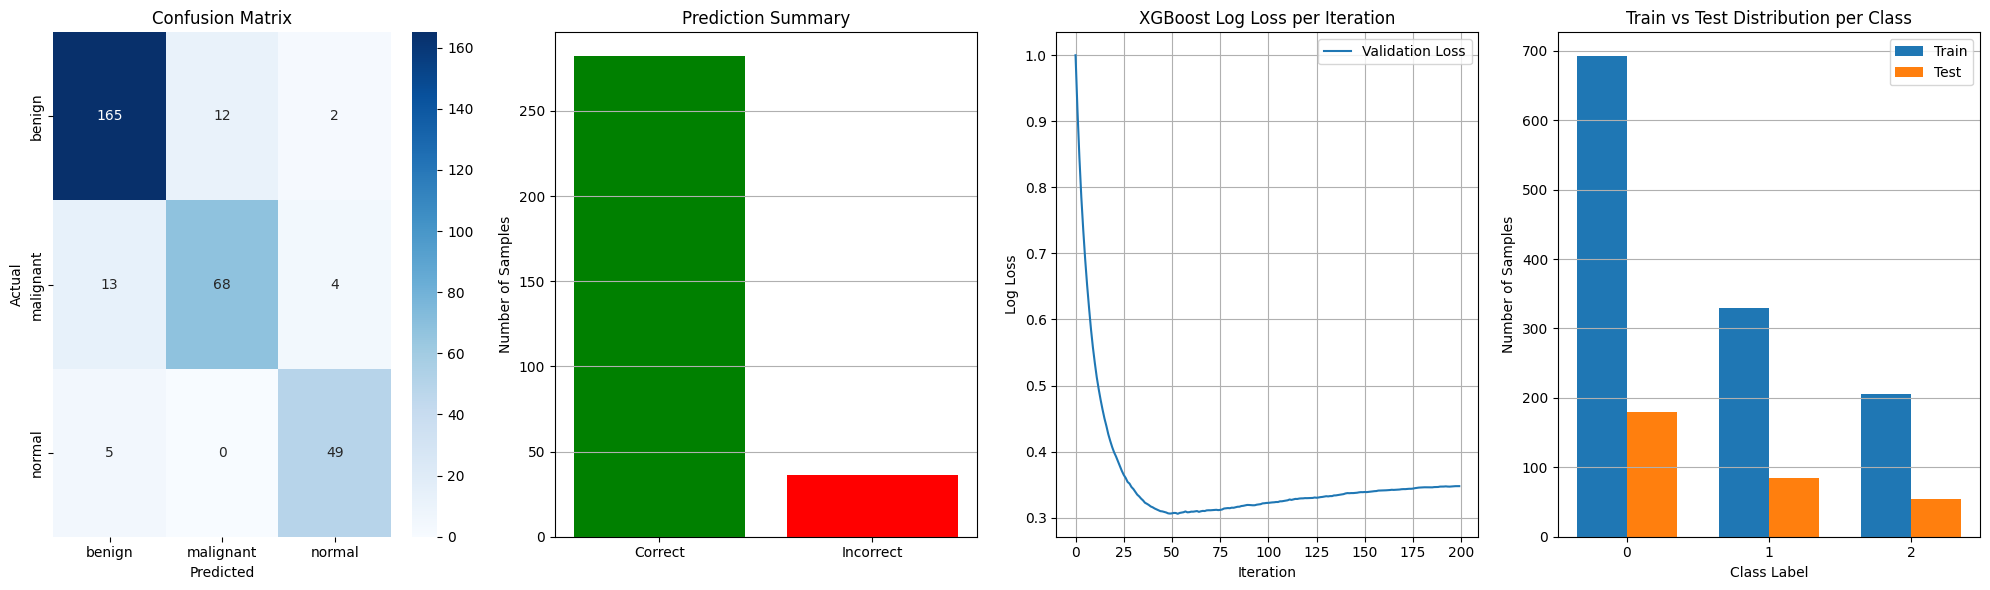

In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image, ImageFile, UnidentifiedImageError
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import joblib
import h5py
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

ImageFile.LOAD_TRUNCATED_IMAGES = True

# Path to original dataset
src_dataset_path = "./Dataset_BUSI_with_GT"

# Remove corrupted images
def remove_corrupted_images(directory):
    count = 0
    for root, _, files in os.walk(directory):
        for fname in files:
            fpath = os.path.join(root, fname)
            try:
                with Image.open(fpath) as img:
                    img.load()
                    img.verify()
            except (OSError, UnidentifiedImageError):
                os.remove(fpath)
                count += 1
                print(f"❌ Removed corrupted: {fpath}")
    print(f"[INFO] Total corrupted images removed: {count}")

def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.load()
            img.verify()
        return True
    except Exception:
        return False

# Create train/test folder structure
def prepare_dataset_structure(src_dir, dst_dir='dataset', split_ratio=0.2):
    classes = os.listdir(src_dir)
    total_images = 0
    for cls in classes:
        files = [f for f in Path(os.path.join(src_dir, cls)).glob('*.*') if is_valid_image(f)]
        total_images += len(files)
        train_files, test_files = train_test_split(files, test_size=split_ratio, random_state=42)

        for subset, file_list in zip(['train', 'test'], [train_files, test_files]):
            out_dir = Path(dst_dir) / subset / cls
            out_dir.mkdir(parents=True, exist_ok=True)
            for file in file_list:
                shutil.copy(file, out_dir / file.name)

    if total_images < 1200:
        raise ValueError(f"❌ Jumlah total gambar valid hanya {total_images}, harus minimal 1200 untuk lanjut.")
    else:
        print(f"✅ Jumlah total gambar valid: {total_images}")

# Prepare dataset if not yet prepared
if not os.path.exists("dataset/train"):
    prepare_dataset_structure(src_dataset_path)
    print("[INFO] Dataset has been split into train/test folders.")
    remove_corrupted_images("dataset/train")
    remove_corrupted_images("dataset/test")

# Image generator and preprocessing
image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    'dataset/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    'dataset/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Feature extraction
print("\n[INFO] Extracting features with ResNet50...")
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def safe_extract_features(generator):
    features, labels = [], []
    for i in range(len(generator)):
        try:
            x_batch, y_batch = generator[i]
            f = base_model.predict(x_batch, verbose=0)
            features.append(f)
            labels.extend(y_batch)
        except Exception as e:
            print(f"⚠️ Skipping batch {i} due to error: {e}")
    return np.vstack(features), np.array(labels)

X_train_features, y_train = safe_extract_features(train_generator)
X_test_features, y_test = safe_extract_features(test_generator)

# Model training
print("\n[INFO] Training XGBoost classifier without LDA...")
clf = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', verbosity=1)
eval_result = clf.fit(X_train_features, y_train, eval_set=[(X_test_features, y_test)], verbose=True)

# Save model
joblib.dump(clf, "xgboost_model.pkl")
print("\n📌 Model saved as 'xgboost_model.pkl'")

# Save data
with h5py.File("xgboost_model.h5", "w") as hf:
    hf.create_dataset("X_train_features", data=X_train_features)
    hf.create_dataset("y_train", data=y_train)
    hf.create_dataset("X_test_features", data=X_test_features)
    hf.create_dataset("y_test", data=y_test)
    hf.attrs['description'] = 'ResNet50 features and labels for XGBoost training'

# Model evaluation
print("\n[INFO] Evaluating model...")
y_pred = clf.predict(X_test_features)

acc = accuracy_score(y_test, y_pred) * 100
print(f"\n✅ Accuracy: {acc:.2f}%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualization
plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.subplot(1, 4, 2)
correct = np.sum(y_test == y_pred)
incorrect = len(y_test) - correct
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title('Prediction Summary')
plt.ylabel('Number of Samples')
plt.grid(axis='y')

plt.subplot(1, 4, 3)
xgb_eval = clf.evals_result()
plt.plot(xgb_eval['validation_0']['mlogloss'], label='Validation Loss')
plt.title('XGBoost Log Loss per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 4, 4)
labels = np.unique(np.concatenate([y_train, y_test]))
train_counts = [np.sum(y_train == label) for label in labels]
test_counts = [np.sum(y_test == label) for label in labels]
bar_width = 0.35
index = np.arange(len(labels))
plt.bar(index, train_counts, bar_width, label='Train')
plt.bar(index + bar_width, test_counts, bar_width, label='Test')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Train vs Test Distribution per Class')
plt.xticks(index + bar_width / 2, [str(int(l)) for l in labels])
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO] Class: benign - Valid image count: 891
[INFO] Class: malignant - Valid image count: 421
[INFO] Class: normal - Valid image count: 266
✅ Jumlah total gambar valid: 1578
[INFO] Dataset has been split into train/test folders.
[INFO] Total corrupted images removed: 0
[INFO] Total corrupted images removed: 0
Found 1260 images belonging to 3 classes.
Found 318 images belonging to 3 classes.

[INFO] Fine-tuning ResNet50...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


40/40 ━━━━━━━━━━━━━━━━━━━━ 459s 11s/step - accuracy: 0.6610 - loss: 0.7827 - val_accuracy: 0.8553 - val_loss: 0.3344
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 448s 11s/step - accuracy: 0.8350 - loss: 0.3736 - val_accuracy: 0.9088 - val_loss: 0.2738
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 442s 11s/step - accuracy: 0.8826 - loss: 0.3172 - val_accuracy: 0.9088 - val_loss: 0.3023
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 428s 11s/step - accuracy: 0.9025 - loss: 0.2594 - val_accuracy: 0.8899 - val_loss: 0.3200
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 441s 11s/step - accuracy: 0.8975 - loss: 0.2559 - val_accuracy: 0.9214 - val_loss: 0.2833
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 444s 11s/step - accuracy: 0.9084 - loss: 0.2271 - val_accuracy: 0.9560 - val_loss: 0.2237
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 424s 11s/step - accuracy: 0.9352 - loss: 0.1830 - val_accuracy: 0.9308 - val_loss: 0.2495
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 423s 11s/step - accuracy: 0.9424 - loss: 0.1560 - val_accuracy: 0.9057 - val_

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



[INFO] Training LightGBM Classifier without optimization...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20225
[LightGBM] [Info] Number of data points in the train set: 1260, number of used features: 125
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


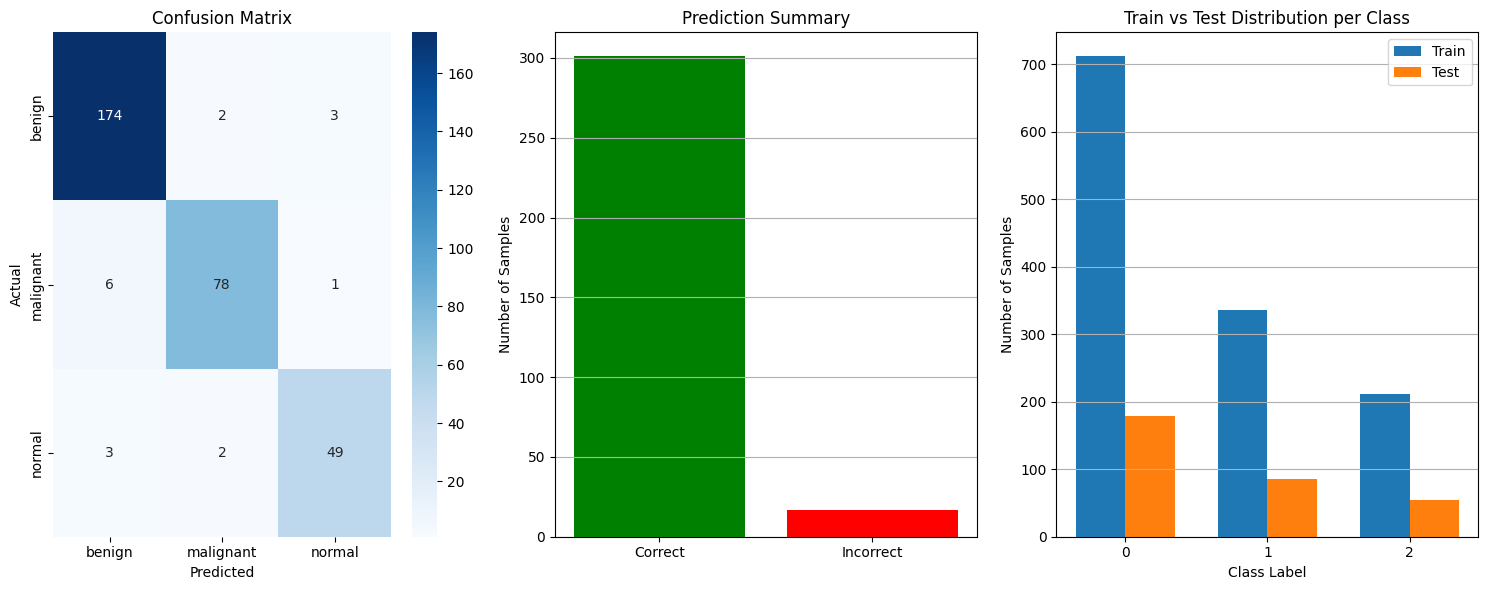

In [ ]:
!pip install lightgbm
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image, ImageFile, UnidentifiedImageError
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.utils.class_weight import compute_sample_weight
import joblib
import h5py
from lightgbm import LGBMClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

ImageFile.LOAD_TRUNCATED_IMAGES = True

# Path to dataset on Google Drive
src_dataset_path = "/content/drive/MyDrive/Dataset/Dataset_BUSI_with_GT"

def remove_corrupted_images(directory):
    count = 0
    for root, _, files in os.walk(directory):
        for fname in files:
            fpath = os.path.join(root, fname)
            try:
                with Image.open(fpath) as img:
                    img.load()
            except (OSError, UnidentifiedImageError):
                os.remove(fpath)
                count += 1
                print(f"❌ Removed corrupted: {fpath}")
    print(f"[INFO] Total corrupted images removed: {count}")

def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.load()
        return True
    except Exception:
        return False

def prepare_dataset_structure(src_dir, dst_dir='dataset', split_ratio=0.2):
    classes = os.listdir(src_dir)
    total_images = 0
    for cls in classes:
        files = [f for f in Path(os.path.join(src_dir, cls)).glob('*.*') if is_valid_image(f)]
        if len(files) == 0:
            print(f"[WARNING] No valid images found for class '{cls}'. Skipping.")
            continue
        print(f"[INFO] Class: {cls} - Valid image count: {len(files)}")
        labels = [cls] * len(files)
        total_images += len(files)
        train_files, test_files = train_test_split(files, test_size=split_ratio, random_state=42, stratify=labels)

        for subset, file_list in zip(['train', 'test'], [train_files, test_files]):
            out_dir = Path(dst_dir) / subset / cls
            out_dir.mkdir(parents=True, exist_ok=True)
            for file in file_list:
                shutil.copy(file, out_dir / file.name)

    if total_images < 1200:
        raise ValueError(f"❌ Jumlah total gambar valid hanya {total_images}, harus minimal 1200 untuk lanjut.")
    else:
        print(f"✅ Jumlah total gambar valid: {total_images}")

if not os.path.exists("dataset/train"):
    prepare_dataset_structure(src_dataset_path)
    print("[INFO] Dataset has been split into train/test folders.")
    remove_corrupted_images("dataset/train")
    remove_corrupted_images("dataset/test")

image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    'dataset/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    'dataset/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

print("\n[INFO] Fine-tuning ResNet50...")
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
for layer in base_model.layers[:-30]:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(3, activation='softmax')(x)
fine_tune_model = Model(inputs=base_model.input, outputs=x)

fine_tune_model.compile(optimizer=Adam(1e-4),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
fine_tune_model.fit(train_generator, validation_data=test_generator, epochs=15, callbacks=[early_stop])

feature_model = Model(inputs=fine_tune_model.input,
                      outputs=fine_tune_model.get_layer(index=-2).output)
feature_model.save("resnet50_feature_extractor.keras")
print("📌 ResNet50 feature model saved as 'resnet50_feature_extractor.keras'")

def safe_extract_features(generator):
    features, labels = [], []
    for i in range(len(generator)):
        try:
            x_batch, y_batch = generator[i]
            f = feature_model.predict(x_batch, verbose=0)
            features.append(f)
            labels.extend(y_batch)
        except Exception as e:
            print(f"⚠️ Skipping batch {i} due to error: {e}")
    return np.vstack(features), np.array(labels)

X_train_features, y_train = safe_extract_features(train_generator)
X_test_features, y_test = safe_extract_features(test_generator)

print("\n[INFO] Training LightGBM Classifier without optimization...")
clf = LGBMClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.03,
    num_leaves=60,
    min_child_samples=15,
    class_weight='balanced'
)
clf.fit(X_train_features, y_train)

joblib.dump(clf, "lightgbm_classifier.pkl")
print("\n📌 Model saved as 'lightgbm_classifier.pkl'")

with h5py.File("lightgbm_model.h5", "w") as hf:
    hf.create_dataset("X_train_features", data=X_train_features)
    hf.create_dataset("y_train", data=y_train)
    hf.create_dataset("X_test_features", data=X_test_features)
    hf.create_dataset("y_test", data=y_test)
    hf.attrs['description'] = 'Fine-tuned ResNet50 features and labels for LightGBM Classifier'

print("\n[INFO] Evaluating model...")
y_pred = clf.predict(X_test_features)

acc = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average='macro')
print(f"\n📉 Accuracy: {acc:.2f}%")
print(f"📊 Macro F1-score: {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.subplot(1, 4, 2)
correct = np.sum(y_test == y_pred)
incorrect = len(y_test) - correct
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title('Prediction Summary')
plt.ylabel('Number of Samples')
plt.grid(axis='y')

plt.subplot(1, 4, 3)
labels = np.unique(np.concatenate([y_train, y_test]))
train_counts = [np.sum(y_train == label) for label in labels]
test_counts = [np.sum(y_test == label) for label in labels]
bar_width = 0.35
index = np.arange(len(labels))
plt.bar(index, train_counts, bar_width, label='Train')
plt.bar(index + bar_width, test_counts, bar_width, label='Test')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Train vs Test Distribution per Class')
plt.xticks(index + bar_width / 2, [str(int(l)) for l in labels])
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO] Class: benign - Valid image count: 891
[INFO] Class: malignant - Valid image count: 421
[INFO] Class: normal - Valid image count: 266
✅ Jumlah total gambar valid: 1578
[INFO] Dataset has been split into train/test folders.
[INFO] Total corrupted images removed: 0
[INFO] Total corrupted images removed: 0
Found 1260 images belonging to 3 classes.
Found 318 images belonging to 3 classes.

[INFO] Fine-tuning ResNet50...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


40/40 ━━━━━━━━━━━━━━━━━━━━ 617s 15s/step - accuracy: 0.5998 - loss: 0.8455 - val_accuracy: 0.8428 - val_loss: 0.5037 - learning_rate: 1.0000e-04
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 618s 15s/step - accuracy: 0.8019 - loss: 0.4482 - val_accuracy: 0.8931 - val_loss: 0.4697 - learning_rate: 1.0000e-04
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 590s 15s/step - accuracy: 0.8533 - loss: 0.3578 - val_accuracy: 0.9119 - val_loss: 0.2434 - learning_rate: 1.0000e-04
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 587s 15s/step - accuracy: 0.8843 - loss: 0.3076 - val_accuracy: 0.9277 - val_loss: 0.2209 - learning_rate: 1.0000e-04
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 588s 15s/step - accuracy: 0.9171 - loss: 0.2290 - val_accuracy: 0.9340 - val_loss: 0.1814 - learning_rate: 1.0000e-04
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 610s 15s/step - accuracy: 0.9313 - loss: 0.2009 - val_accuracy: 0.9151 - val_loss: 0.3360 - learning_rate: 1.0000e-04
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.9307 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



[INFO] Training LightGBM Classifier without optimization...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20512
[LightGBM] [Info] Number of data points in the train set: 1260, number of used features: 106
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



📉 Accuracy: 96.23%
📊 Macro F1-score: 0.9583
🧮 Mean Squared Error (MSE): 0.0755
📉 Log Loss: 0.3208

Classification Report:

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       179
         1.0       0.98      0.93      0.95        85
         2.0       0.96      0.94      0.95        54

    accuracy                           0.96       318
   macro avg       0.96      0.95      0.96       318
weighted avg       0.96      0.96      0.96       318


Confusion Matrix:
[[176   2   1]
 [  5  79   1]
 [  3   0  51]]


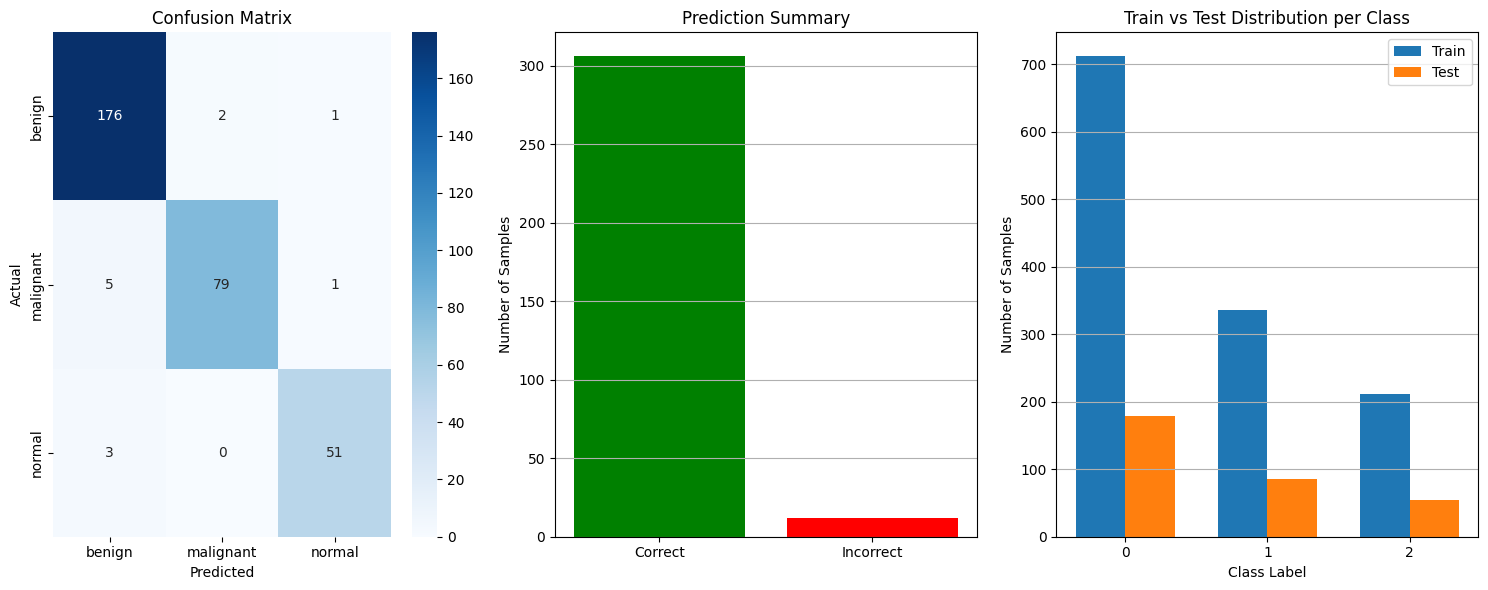

In [ ]:
!pip install lightgbm
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image, ImageFile, UnidentifiedImageError
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    f1_score, mean_squared_error, log_loss
)
from sklearn.utils.class_weight import compute_sample_weight
import joblib
import h5py
from lightgbm import LGBMClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

ImageFile.LOAD_TRUNCATED_IMAGES = True
src_dataset_path = "/content/drive/MyDrive/Dataset/Dataset_BUSI_with_GT"

def remove_corrupted_images(directory):
    count = 0
    for root, _, files in os.walk(directory):
        for fname in files:
            fpath = os.path.join(root, fname)
            try:
                with Image.open(fpath) as img:
                    img.load()
            except (OSError, UnidentifiedImageError):
                os.remove(fpath)
                count += 1
                print(f"❌ Removed corrupted: {fpath}")
    print(f"[INFO] Total corrupted images removed: {count}")

def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.load()
        return True
    except Exception:
        return False

def prepare_dataset_structure(src_dir, dst_dir='dataset', split_ratio=0.2):
    classes = os.listdir(src_dir)
    total_images = 0
    for cls in classes:
        files = [f for f in Path(os.path.join(src_dir, cls)).glob('*.*') if is_valid_image(f)]
        if len(files) == 0:
            print(f"[WARNING] No valid images found for class '{cls}'. Skipping.")
            continue
        print(f"[INFO] Class: {cls} - Valid image count: {len(files)}")
        labels = [cls] * len(files)
        total_images += len(files)
        train_files, test_files = train_test_split(files, test_size=split_ratio, random_state=42, stratify=labels)
        for subset, file_list in zip(['train', 'test'], [train_files, test_files]):
            out_dir = Path(dst_dir) / subset / cls
            out_dir.mkdir(parents=True, exist_ok=True)
            for file in file_list:
                shutil.copy(file, out_dir / file.name)
    if total_images < 1200:
        raise ValueError(f"❌ Jumlah total gambar valid hanya {total_images}, harus minimal 1200 untuk lanjut.")
    else:
        print(f"✅ Jumlah total gambar valid: {total_images}")

if not os.path.exists("dataset/train"):
    prepare_dataset_structure(src_dataset_path)
    print("[INFO] Dataset has been split into train/test folders.")
    remove_corrupted_images("dataset/train")
    remove_corrupted_images("dataset/test")

image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    'dataset/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    'dataset/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

print("\n[INFO] Fine-tuning ResNet50...")
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
for layer in base_model.layers[:-80]:  # Unfreeze more layers for deeper fine-tuning
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(3, activation='softmax')(x)
fine_tune_model = Model(inputs=base_model.input, outputs=x)

fine_tune_model.compile(optimizer=Adam(1e-4),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
fine_tune_model.fit(train_generator, validation_data=test_generator, epochs=15,
                    callbacks=[early_stop, reduce_lr])

feature_model = Model(inputs=fine_tune_model.input,
                      outputs=fine_tune_model.get_layer(index=-2).output)
feature_model.save("resnet50_feature_extractor.keras")
print("📌 ResNet50 feature model saved as 'resnet50_feature_extractor.keras'")

def safe_extract_features(generator):
    features, labels = [], []
    for i in range(len(generator)):
        try:
            x_batch, y_batch = generator[i]
            f = feature_model.predict(x_batch, verbose=0)
            features.append(f)
            labels.extend(y_batch)
        except Exception as e:
            print(f"⚠️ Skipping batch {i} due to error: {e}")
    return np.vstack(features), np.array(labels)

X_train_features, y_train = safe_extract_features(train_generator)
X_test_features, y_test = safe_extract_features(test_generator)

print("\n[INFO] Training LightGBM Classifier without optimization...")
clf = LGBMClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.03,
    num_leaves=60,
    min_child_samples=100,
    class_weight='balanced'
)
clf.fit(X_train_features, y_train)

joblib.dump(clf, "lightgbm_classifier.pkl")
print("\n📌 Model saved as 'lightgbm_classifier.pkl'")

with h5py.File("lightgbm_model.h5", "w") as hf:
    hf.create_dataset("X_train_features", data=X_train_features)
    hf.create_dataset("y_train", data=y_train)
    hf.create_dataset("X_test_features", data=X_test_features)
    hf.create_dataset("y_test", data=y_test)
    hf.attrs['description'] = 'Fine-tuned ResNet50 features and labels for LightGBM Classifier'

print("\n[INFO] Evaluating model...")
y_pred = clf.predict(X_test_features)
y_proba = clf.predict_proba(X_test_features)

acc = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average='macro')
mse = mean_squared_error(y_test, y_pred)
ll = log_loss(y_test, y_proba)

print(f"\n📉 Accuracy: {acc:.2f}%")
print(f"📊 Macro F1-score: {f1:.4f}")
print(f"🧮 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Log Loss: {ll:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.subplot(1, 4, 2)
correct = np.sum(y_test == y_pred)
incorrect = len(y_test) - correct
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title('Prediction Summary')
plt.ylabel('Number of Samples')
plt.grid(axis='y')

plt.subplot(1, 4, 3)
labels = np.unique(np.concatenate([y_train, y_test]))
train_counts = [np.sum(y_train == label) for label in labels]
test_counts = [np.sum(y_test == label) for label in labels]
bar_width = 0.35
index = np.arange(len(labels))
plt.bar(index, train_counts, bar_width, label='Train')
plt.bar(index + bar_width, test_counts, bar_width, label='Test')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Train vs Test Distribution per Class')
plt.xticks(index + bar_width / 2, [str(int(l)) for l in labels])
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO] Class: benign - Valid image count: 891
[INFO] Class: malignant - Valid image count: 421
[INFO] Class: normal - Valid image count: 266
✅ Jumlah total gambar valid: 1578
[INFO] Dataset has been split into train/test folders.
[INFO] Total corrupted images removed: 0
[INFO] Total corrupted images removed: 0
Found 1260 images belonging to 3 classes.
Found 318 images belonging to 3 classes.

[INFO] Fine-tuning ResNet50...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


40/40 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.5573 - loss: 0.9184 - val_accuracy: 0.7358 - val_loss: 0.8456 - learning_rate: 1.0000e-04
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 95s 899ms/step - accuracy: 0.7992 - loss: 0.4541 - val_accuracy: 0.8774 - val_loss: 0.6149 - learning_rate: 1.0000e-04
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 37s 804ms/step - accuracy: 0.8786 - loss: 0.3279 - val_accuracy: 0.9151 - val_loss: 0.2967 - learning_rate: 1.0000e-04
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 811ms/step - accuracy: 0.9001 - loss: 0.2778 - val_accuracy: 0.9371 - val_loss: 0.2264 - learning_rate: 1.0000e-04
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 875ms/step - accuracy: 0.9229 - loss: 0.2107 - val_accuracy: 0.8962 - val_loss: 0.3787 - learning_rate: 1.0000e-04
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 35s 886ms/step - accuracy: 0.9280 - loss: 0.1999 - val_accuracy: 0.9340 - val_loss: 0.2054 - learning_rate: 1.0000e-04
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 759ms/step - accuracy: 0.9385

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



[INFO] Training LightGBM Classifier without optimization...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20747
[LightGBM] [Info] Number of data points in the train set: 1260, number of used features: 117
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


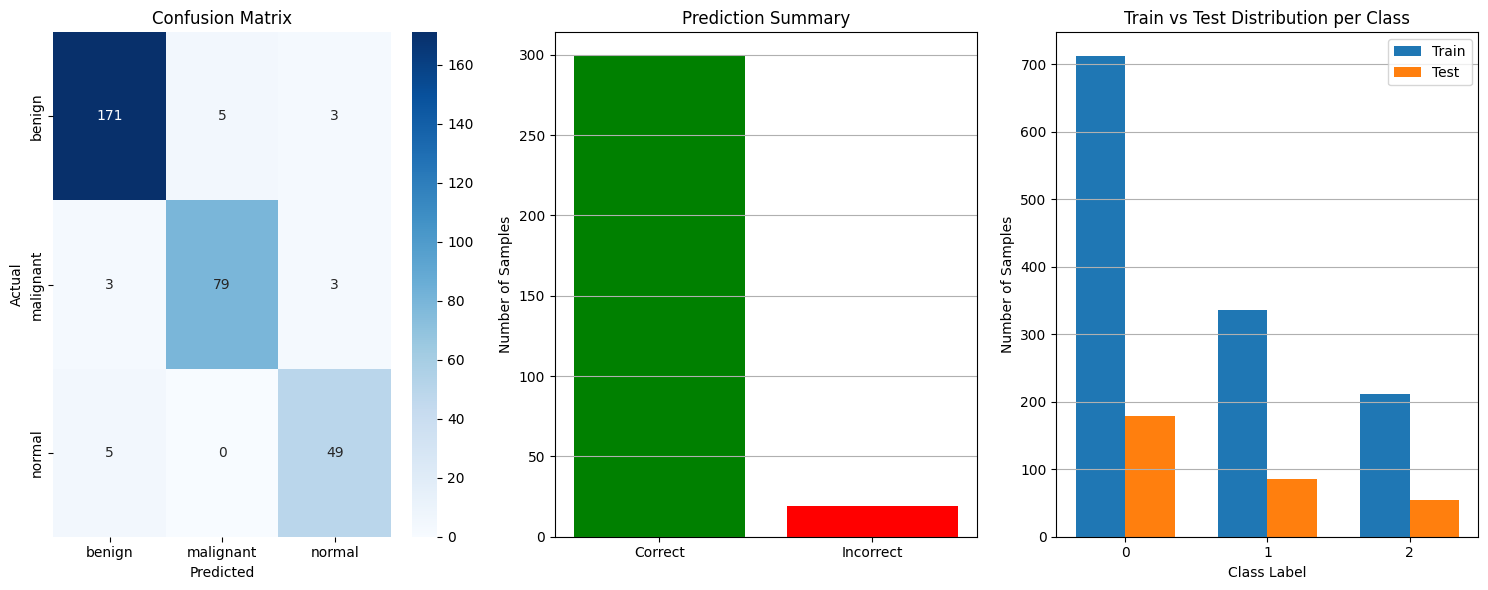

In [ ]:
!pip install lightgbm
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image, ImageFile, UnidentifiedImageError
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    f1_score, mean_squared_error, log_loss
)
from sklearn.utils.class_weight import compute_sample_weight
import joblib
import h5py
from lightgbm import LGBMClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

ImageFile.LOAD_TRUNCATED_IMAGES = True
src_dataset_path = "/content/drive/MyDrive/Dataset/Dataset_BUSI_with_GT"

def remove_corrupted_images(directory):
    count = 0
    for root, _, files in os.walk(directory):
        for fname in files:
            fpath = os.path.join(root, fname)
            try:
                with Image.open(fpath) as img:
                    img.load()
            except (OSError, UnidentifiedImageError):
                os.remove(fpath)
                count += 1
                print(f"❌ Removed corrupted: {fpath}")
    print(f"[INFO] Total corrupted images removed: {count}")

def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.load()
        return True
    except Exception:
        return False

def prepare_dataset_structure(src_dir, dst_dir='dataset', split_ratio=0.2):
    classes = os.listdir(src_dir)
    total_images = 0
    for cls in classes:
        files = [f for f in Path(os.path.join(src_dir, cls)).glob('*.*') if is_valid_image(f)]
        if len(files) == 0:
            print(f"[WARNING] No valid images found for class '{cls}'. Skipping.")
            continue
        print(f"[INFO] Class: {cls} - Valid image count: {len(files)}")
        labels = [cls] * len(files)
        total_images += len(files)
        train_files, test_files = train_test_split(files, test_size=split_ratio, random_state=42, stratify=labels)
        for subset, file_list in zip(['train', 'test'], [train_files, test_files]):
            out_dir = Path(dst_dir) / subset / cls
            out_dir.mkdir(parents=True, exist_ok=True)
            for file in file_list:
                shutil.copy(file, out_dir / file.name)
    if total_images < 1200:
        raise ValueError(f"❌ Jumlah total gambar valid hanya {total_images}, harus minimal 1200 untuk lanjut.")
    else:
        print(f"✅ Jumlah total gambar valid: {total_images}")

if not os.path.exists("dataset/train"):
    prepare_dataset_structure(src_dataset_path)
    print("[INFO] Dataset has been split into train/test folders.")
    remove_corrupted_images("dataset/train")
    remove_corrupted_images("dataset/test")

image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    'dataset/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    'dataset/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

print("\n[INFO] Fine-tuning ResNet50...")
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
for layer in base_model.layers[:-80]:  # Unfreeze more layers for deeper fine-tuning
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(3, activation='softmax')(x)
fine_tune_model = Model(inputs=base_model.input, outputs=x)

fine_tune_model.compile(optimizer=Adam(1e-4),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
fine_tune_model.fit(train_generator, validation_data=test_generator, epochs=15,
                    callbacks=[early_stop, reduce_lr])

feature_model = Model(inputs=fine_tune_model.input,
                      outputs=fine_tune_model.get_layer(index=-2).output)
feature_model.save("resnet50_feature_extractor.keras")
print("📌 ResNet50 feature model saved as 'resnet50_feature_extractor.keras'")

def safe_extract_features(generator):
    features, labels = [], []
    for i in range(len(generator)):
        try:
            x_batch, y_batch = generator[i]
            f = feature_model.predict(x_batch, verbose=0)
            features.append(f)
            labels.extend(y_batch)
        except Exception as e:
            print(f"⚠️ Skipping batch {i} due to error: {e}")
    return np.vstack(features), np.array(labels)

X_train_features, y_train = safe_extract_features(train_generator)
X_test_features, y_test = safe_extract_features(test_generator)

print("\n[INFO] Training LightGBM Classifier without optimization...")
clf = LGBMClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.03,
    num_leaves=60,
    min_child_samples=100,
    class_weight='balanced'
)
clf.fit(X_train_features, y_train)

joblib.dump(clf, "lightgbm_classifier.pkl")
print("\n📌 Model saved as 'lightgbm_classifier.pkl'")

with h5py.File("lightgbm_model.h5", "w") as hf:
    hf.create_dataset("X_train_features", data=X_train_features)
    hf.create_dataset("y_train", data=y_train)
    hf.create_dataset("X_test_features", data=X_test_features)
    hf.create_dataset("y_test", data=y_test)
    hf.attrs['description'] = 'Fine-tuned ResNet50 features and labels for LightGBM Classifier'

print("\n[INFO] Evaluating model...")
y_pred = clf.predict(X_test_features)
y_proba = clf.predict_proba(X_test_features)

acc = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average='macro')
mse = mean_squared_error(y_test, y_pred)
ll = log_loss(y_test, y_proba)

print(f"\n📉 Accuracy: {acc:.2f}%")
print(f"📊 Macro F1-score: {f1:.4f}")
print(f"🧮 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Log Loss: {ll:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.subplot(1, 4, 2)
correct = np.sum(y_test == y_pred)
incorrect = len(y_test) - correct
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title('Prediction Summary')
plt.ylabel('Number of Samples')
plt.grid(axis='y')

plt.subplot(1, 4, 3)
labels = np.unique(np.concatenate([y_train, y_test]))
train_counts = [np.sum(y_train == label) for label in labels]
test_counts = [np.sum(y_test == label) for label in labels]
bar_width = 0.35
index = np.arange(len(labels))
plt.bar(index, train_counts, bar_width, label='Train')
plt.bar(index + bar_width, test_counts, bar_width, label='Test')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Train vs Test Distribution per Class')
plt.xticks(index + bar_width / 2, [str(int(l)) for l in labels])
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1260 images belonging to 3 classes.
Found 318 images belonging to 3 classes.

[INFO] Fine-tuning ResNet50 using RMSprop...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_183']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


40/40 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.6357 - loss: 0.8147 - val_accuracy: 0.8176 - val_loss: 0.6469 - learning_rate: 1.0000e-04
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 772ms/step - accuracy: 0.8258 - loss: 0.3953 - val_accuracy: 0.8679 - val_loss: 0.4741 - learning_rate: 1.0000e-04
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 789ms/step - accuracy: 0.8618 - loss: 0.3300 - val_accuracy: 0.8868 - val_loss: 0.5503 - learning_rate: 1.0000e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.9002 - loss: 0.2870
Epoch 4: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
40/40 ━━━━━━━━━━━━━━━━━━━━ 32s 804ms/step - accuracy: 0.9001 - loss: 0.2872 - val_accuracy: 0.9025 - val_loss: 0.5745 - learning_rate: 1.0000e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 760ms/step - accuracy: 0.9172 - loss: 0.2222 - val_accuracy: 0.9528 - val_loss: 0.4006 - learning_rate: 5.0000e-05
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 895ms/step - accuracy: 0.9268 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_183']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



[INFO] Training LightGBM Classifier without optimization...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 20474
[LightGBM] [Info] Number of data points in the train set: 1260, number of used features: 113
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


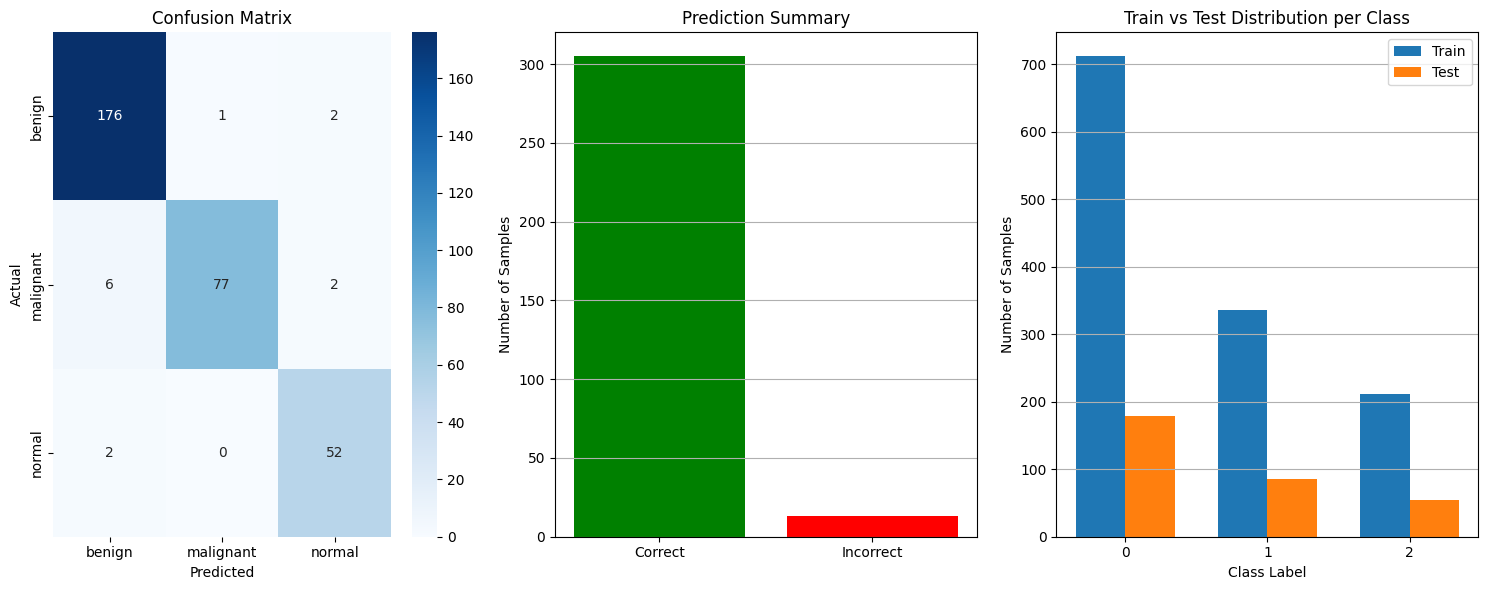

In [ ]:
!pip install lightgbm
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image, ImageFile, UnidentifiedImageError
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    f1_score, mean_squared_error, log_loss
)
from sklearn.utils.class_weight import compute_sample_weight
import joblib
import h5py
from lightgbm import LGBMClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

ImageFile.LOAD_TRUNCATED_IMAGES = True
src_dataset_path = "/content/drive/MyDrive/Dataset/Dataset_BUSI_with_GT"

def remove_corrupted_images(directory):
    count = 0
    for root, _, files in os.walk(directory):
        for fname in files:
            fpath = os.path.join(root, fname)
            try:
                with Image.open(fpath) as img:
                    img.load()
            except (OSError, UnidentifiedImageError):
                os.remove(fpath)
                count += 1
                print(f"❌ Removed corrupted: {fpath}")
    print(f"[INFO] Total corrupted images removed: {count}")

def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.load()
        return True
    except Exception:
        return False

def prepare_dataset_structure(src_dir, dst_dir='dataset', split_ratio=0.2):
    classes = os.listdir(src_dir)
    total_images = 0
    for cls in classes:
        files = [f for f in Path(os.path.join(src_dir, cls)).glob('*.*') if is_valid_image(f)]
        if len(files) == 0:
            print(f"[WARNING] No valid images found for class '{cls}'. Skipping.")
            continue
        print(f"[INFO] Class: {cls} - Valid image count: {len(files)}")
        labels = [cls] * len(files)
        total_images += len(files)
        train_files, test_files = train_test_split(files, test_size=split_ratio, random_state=42, stratify=labels)
        for subset, file_list in zip(['train', 'test'], [train_files, test_files]):
            out_dir = Path(dst_dir) / subset / cls
            out_dir.mkdir(parents=True, exist_ok=True)
            for file in file_list:
                shutil.copy(file, out_dir / file.name)
    if total_images < 1200:
        raise ValueError(f"❌ Jumlah total gambar valid hanya {total_images}, harus minimal 1200 untuk lanjut.")
    else:
        print(f"✅ Jumlah total gambar valid: {total_images}")

if not os.path.exists("dataset/train"):
    prepare_dataset_structure(src_dataset_path)
    print("[INFO] Dataset has been split into train/test folders.")
    remove_corrupted_images("dataset/train")
    remove_corrupted_images("dataset/test")

image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    'dataset/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    'dataset/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

print("\n[INFO] Fine-tuning ResNet50 using RMSprop...")
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
for layer in base_model.layers[:-80]:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(3, activation='softmax')(x)
fine_tune_model = Model(inputs=base_model.input, outputs=x)

fine_tune_model.compile(optimizer=RMSprop(learning_rate=1e-4),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
fine_tune_model.fit(train_generator, validation_data=test_generator, epochs=20,
                    callbacks=[early_stop, reduce_lr])

feature_model = Model(inputs=fine_tune_model.input,
                      outputs=fine_tune_model.get_layer(index=-2).output)
feature_model.save("resnet50_feature_extractor.keras")
print("📌 ResNet50 feature model saved as 'resnet50_feature_extractor.keras'")

def safe_extract_features(generator):
    features, labels = [], []
    for i in range(len(generator)):
        try:
            x_batch, y_batch = generator[i]
            f = feature_model.predict(x_batch, verbose=0)
            features.append(f)
            labels.extend(y_batch)
        except Exception as e:
            print(f"⚠️ Skipping batch {i} due to error: {e}")
    return np.vstack(features), np.array(labels)

X_train_features, y_train = safe_extract_features(train_generator)
X_test_features, y_test = safe_extract_features(test_generator)

print("\n[INFO] Training LightGBM Classifier without optimization...")
clf = LGBMClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.03,
    num_leaves=60,
    min_child_samples=100,
    class_weight='balanced'
)
clf.fit(X_train_features, y_train)

joblib.dump(clf, "lightgbm_classifier.pkl")
print("\n📌 Model saved as 'lightgbm_classifier.pkl'")

with h5py.File("lightgbm_model.h5", "w") as hf:
    hf.create_dataset("X_train_features", data=X_train_features)
    hf.create_dataset("y_train", data=y_train)
    hf.create_dataset("X_test_features", data=X_test_features)
    hf.create_dataset("y_test", data=y_test)
    hf.attrs['description'] = 'Fine-tuned ResNet50 features and labels for LightGBM Classifier'

print("\n[INFO] Evaluating model...")
y_pred = clf.predict(X_test_features)
y_proba = clf.predict_proba(X_test_features)

acc = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average='macro')
mse = mean_squared_error(y_test, y_pred)
ll = log_loss(y_test, y_proba)

print(f"\n📉 Accuracy: {acc:.2f}%")
print(f"📊 Macro F1-score: {f1:.4f}")
print(f"🧮 Mean Squared Error (MSE): {mse:.A4f}")
print(f"📉 Log Loss: {ll:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.subplot(1, 4, 2)
correct = np.sum(y_test == y_pred)
incorrect = len(y_test) - correct
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title('Prediction Summary')
plt.ylabel('Number of Samples')
plt.grid(axis='y')

plt.subplot(1, 4, 3)
labels = np.unique(np.concatenate([y_train, y_test]))
train_counts = [np.sum(y_train == label) for label in labels]
test_counts = [np.sum(y_test == label) for label in labels]
bar_width = 0.35
index = np.arange(len(labels))
plt.bar(index, train_counts, bar_width, label='Train')
plt.bar(index + bar_width, test_counts, bar_width, label='Test')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Train vs Test Distribution per Class')
plt.xticks(index + bar_width / 2, [str(int(l)) for l in labels])
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 1260 images belonging to 3 classes.
Found 318 images belonging to 3 classes.

[INFO] Fine-tuning ResNet50 using RMSprop...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_366']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


40/40 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.5365 - loss: 1.0516 - val_accuracy: 0.7830 - val_loss: 0.4701 - learning_rate: 1.0000e-04
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 781ms/step - accuracy: 0.7960 - loss: 0.4489 - val_accuracy: 0.8679 - val_loss: 0.4687 - learning_rate: 1.0000e-04
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 817ms/step - accuracy: 0.8672 - loss: 0.3434 - val_accuracy: 0.9182 - val_loss: 0.5750 - learning_rate: 1.0000e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 777ms/step - accuracy: 0.8693 - loss: 0.3022 - val_accuracy: 0.9245 - val_loss: 0.4031 - learning_rate: 1.0000e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 31s 776ms/step - accuracy: 0.9195 - loss: 0.2385 - val_accuracy: 0.9119 - val_loss: 0.8348 - learning_rate: 1.0000e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.9015 - loss: 0.2470
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 832ms/step - accuracy: 0.9020 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_366']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



[INFO] Training LightGBM Classifier without optimization...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19730
[LightGBM] [Info] Number of data points in the train set: 1260, number of used features: 113
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



📉 Accuracy: 94.97%
📊 Macro F1-score: 0.9488
🧮 Mean Squared Error (MSE): 0.0881
📉 Log Loss: 0.3112

Classification Report:

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       179
         1.0       0.95      0.91      0.93        85
         2.0       0.96      0.96      0.96        54

    accuracy                           0.95       318
   macro avg       0.95      0.95      0.95       318
weighted avg       0.95      0.95      0.95       318


Confusion Matrix:
[[173   4   2]
 [  8  77   0]
 [  2   0  52]]


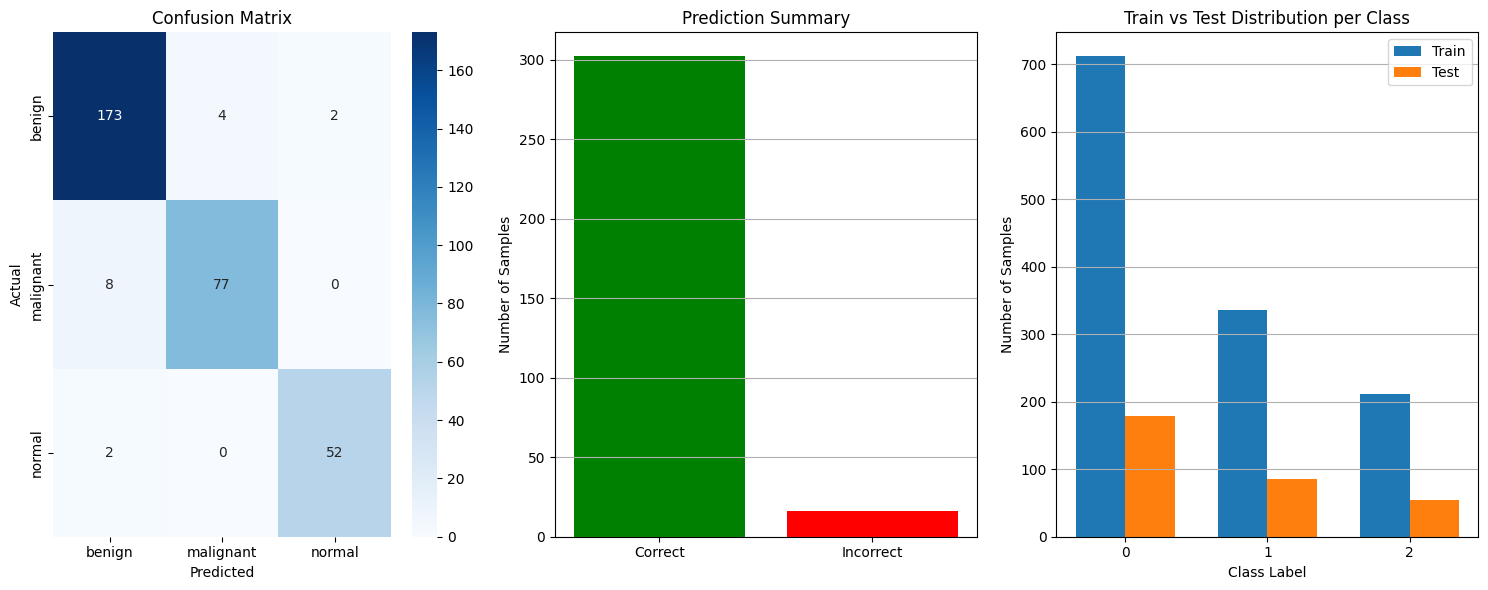

In [ ]:
!pip install lightgbm
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image, ImageFile, UnidentifiedImageError
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    f1_score, mean_squared_error, log_loss
)
from sklearn.utils.class_weight import compute_sample_weight
import joblib
import h5py
from lightgbm import LGBMClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

ImageFile.LOAD_TRUNCATED_IMAGES = True
src_dataset_path = "/content/drive/MyDrive/Dataset/Dataset_BUSI_with_GT"

def remove_corrupted_images(directory):
    count = 0
    for root, _, files in os.walk(directory):
        for fname in files:
            fpath = os.path.join(root, fname)
            try:
                with Image.open(fpath) as img:
                    img.load()
            except (OSError, UnidentifiedImageError):
                os.remove(fpath)
                count += 1
                print(f"❌ Removed corrupted: {fpath}")
    print(f"[INFO] Total corrupted images removed: {count}")

def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.load()
        return True
    except Exception:
        return False

def prepare_dataset_structure(src_dir, dst_dir='dataset', split_ratio=0.2):
    classes = os.listdir(src_dir)
    total_images = 0
    for cls in classes:
        files = [f for f in Path(os.path.join(src_dir, cls)).glob('*.*') if is_valid_image(f)]
        if len(files) == 0:
            print(f"[WARNING] No valid images found for class '{cls}'. Skipping.")
            continue
        print(f"[INFO] Class: {cls} - Valid image count: {len(files)}")
        labels = [cls] * len(files)
        total_images += len(files)
        train_files, test_files = train_test_split(files, test_size=split_ratio, random_state=42, stratify=labels)
        for subset, file_list in zip(['train', 'test'], [train_files, test_files]):
            out_dir = Path(dst_dir) / subset / cls
            out_dir.mkdir(parents=True, exist_ok=True)
            for file in file_list:
                shutil.copy(file, out_dir / file.name)
    if total_images < 1200:
        raise ValueError(f"❌ Jumlah total gambar valid hanya {total_images}, harus minimal 1200 untuk lanjut.")
    else:
        print(f"✅ Jumlah total gambar valid: {total_images}")

if not os.path.exists("dataset/train"):
    prepare_dataset_structure(src_dataset_path)
    print("[INFO] Dataset has been split into train/test folders.")
    remove_corrupted_images("dataset/train")
    remove_corrupted_images("dataset/test")

image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    'dataset/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    'dataset/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

print("\n[INFO] Fine-tuning ResNet50 using RMSprop...")
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
for layer in base_model.layers[:-80]:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(3, activation='softmax')(x)
fine_tune_model = Model(inputs=base_model.input, outputs=x)

fine_tune_model.compile(optimizer=RMSprop(learning_rate=1e-4),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
fine_tune_model.fit(train_generator, validation_data=test_generator, epochs=20,
                    callbacks=[reduce_lr])

feature_model = Model(inputs=fine_tune_model.input,
                      outputs=fine_tune_model.get_layer(index=-2).output)
feature_model.save("resnet50_feature_extractor.keras")
print("📌 ResNet50 feature model saved as 'resnet50_feature_extractor.keras'")

def safe_extract_features(generator):
    features, labels = [], []
    for i in range(len(generator)):
        try:
            x_batch, y_batch = generator[i]
            f = feature_model.predict(x_batch, verbose=0)
            features.append(f)
            labels.extend(y_batch)
        except Exception as e:
            print(f"⚠️ Skipping batch {i} due to error: {e}")
    return np.vstack(features), np.array(labels)

X_train_features, y_train = safe_extract_features(train_generator)
X_test_features, y_test = safe_extract_features(test_generator)

print("\n[INFO] Training LightGBM Classifier without optimization...")
clf = LGBMClassifier(
    n_estimators=300,
    max_depth=8,
    learning_rate=0.03,
    num_leaves=60,
    min_child_samples=100,
    class_weight='balanced'
)
clf.fit(X_train_features, y_train)

joblib.dump(clf, "lightgbm_classifier.pkl")
print("\n📌 Model saved as 'lightgbm_classifier.pkl'")

with h5py.File("lightgbm_model.h5", "w") as hf:
    hf.create_dataset("X_train_features", data=X_train_features)
    hf.create_dataset("y_train", data=y_train)
    hf.create_dataset("X_test_features", data=X_test_features)
    hf.create_dataset("y_test", data=y_test)
    hf.attrs['description'] = 'Fine-tuned ResNet50 features and labels for LightGBM Classifier'

print("\n[INFO] Evaluating model...")
y_pred = clf.predict(X_test_features)
y_proba = clf.predict_proba(X_test_features)

acc = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average='macro')
mse = mean_squared_error(y_test, y_pred)
ll = log_loss(y_test, y_proba)

print(f"\n📉 Accuracy: {acc:.2f}%")
print(f"📊 Macro F1-score: {f1:.4f}")
print(f"🧮 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Log Loss: {ll:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.subplot(1, 4, 2)
correct = np.sum(y_test == y_pred)
incorrect = len(y_test) - correct
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title('Prediction Summary')
plt.ylabel('Number of Samples')
plt.grid(axis='y')

plt.subplot(1, 4, 3)
labels = np.unique(np.concatenate([y_train, y_test]))
train_counts = [np.sum(y_train == label) for label in labels]
test_counts = [np.sum(y_test == label) for label in labels]
bar_width = 0.35
index = np.arange(len(labels))
plt.bar(index, train_counts, bar_width, label='Train')
plt.bar(index + bar_width, test_counts, bar_width, label='Test')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Train vs Test Distribution per Class')
plt.xticks(index + bar_width / 2, [str(int(l)) for l in labels])
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO] Class: benign - Valid image count: 891
[INFO] Class: normal - Valid image count: 266
[INFO] Class: malignant - Valid image count: 421
Jumlah total gambar valid: 1578
[INFO] Dataset has been split into train/test folders.
[INFO] Total corrupted images removed: 0
[INFO] Total corrupted images removed: 0
Found 1260 images belonging to 3 classes.
Found 318 images belonging to 3 classes.

[INFO] Fine-tuning ResNet50 using RMSprop...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


40/40 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.7046 - loss: 0.7059 - val_accuracy: 0.8113 - val_loss: 0.5511 - learning_rate: 1.0000e-04
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 723ms/step - accuracy: 0.8573 - loss: 0.3266 - val_accuracy: 0.8522 - val_loss: 0.9844 - learning_rate: 1.0000e-04
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.8936 - loss: 0.2640
Epoch 3: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
40/40 ━━━━━━━━━━━━━━━━━━━━ 30s 744ms/step - accuracy: 0.8936 - loss: 0.2642 - val_accuracy: 0.8679 - val_loss: 0.6609 - learning_rate: 1.0000e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 41s 734ms/step - accuracy: 0.9223 - loss: 0.2118 - val_accuracy: 0.8836 - val_loss: 0.4003 - learning_rate: 5.0000e-05
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 819ms/step - accuracy: 0.9301 - loss: 0.2018 - val_accuracy: 0.8868 - val_loss: 0.5801 - learning_rate: 5.0000e-05
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 29s 720ms/step - accuracy: 0.9330 - loss

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(32, 224, 224, 3))
  warnings.warn(msg)



[INFO] Tuning LightGBM Classifier with RandomizedSearchCV...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33269
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 208
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.01, max_depth=6, min_child_samples=150, n_estimators=700, num_leaves=30; total time=   3.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33535
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 210
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.01, max_depth=6, min_child_samples=150, n_estimators=700, num_leaves=30; total time=   3.9s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33386
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 210
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33988
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 230
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.01, max_depth=6, min_child_samples=50, n_estimators=700, num_leaves=30; total time=   6.7s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34207
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 231
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.01, max_depth=6, min_child_samples=50, n_estimators=700, num_leaves=30; total time=   8.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001486 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34071
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 232
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.01, max_depth=6, min_child_samples=50, n_estimators=700, num_leaves=30; total time=   6.1s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33725
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 219
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.03, max_depth=10, min_child_samples=100, n_estimators=700, num_leaves=100; total time=   4.8s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33918
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 219
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.03, max_depth=10, min_child_samples=100, n_estimators=700, num_leaves=100; total time=   3.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33758
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 219
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.03, max_depth=10, min_child_samples=100, n_estimators=700, num_leaves=100; total time=   2.9s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003428 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33725
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 219
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_samples=100, n_estimators=700, num_leaves=60; total time=   2.7s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33918
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 219
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_samples=100, n_estimators=700, num_leaves=60; total time=   3.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33758
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 219
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33386
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 210
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.05, max_depth=10, min_child_samples=150, n_estimators=500, num_leaves=60; total time=   1.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33725
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 219
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33535
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 210
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.03, max_depth=10, min_child_samples=100, n_estimators=700, num_leaves=30; total time=   3.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33918
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 219
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.03, max_depth=10, min_child_samples=100, n_estimators=700, num_leaves=30; total time=   4.1s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 33758
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 219
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.03, max_depth=10, min_child_samples=100, n_estimators=700, num_leaves=30; total time=   4.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 33725
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 219
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.03, max_depth=8, min_child_samples=50, n_estimators=500, num_leaves=100; total time=   6.7s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34207
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 231
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34071
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 232
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[CV] END learning_rate=0.03, max_depth=8, min_child_samples=50, n_estimators=500, num_leaves=100; total time=   4.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 43642
[LightGBM] [Info] Number of data points in the train set: 1260, number of used features: 219
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


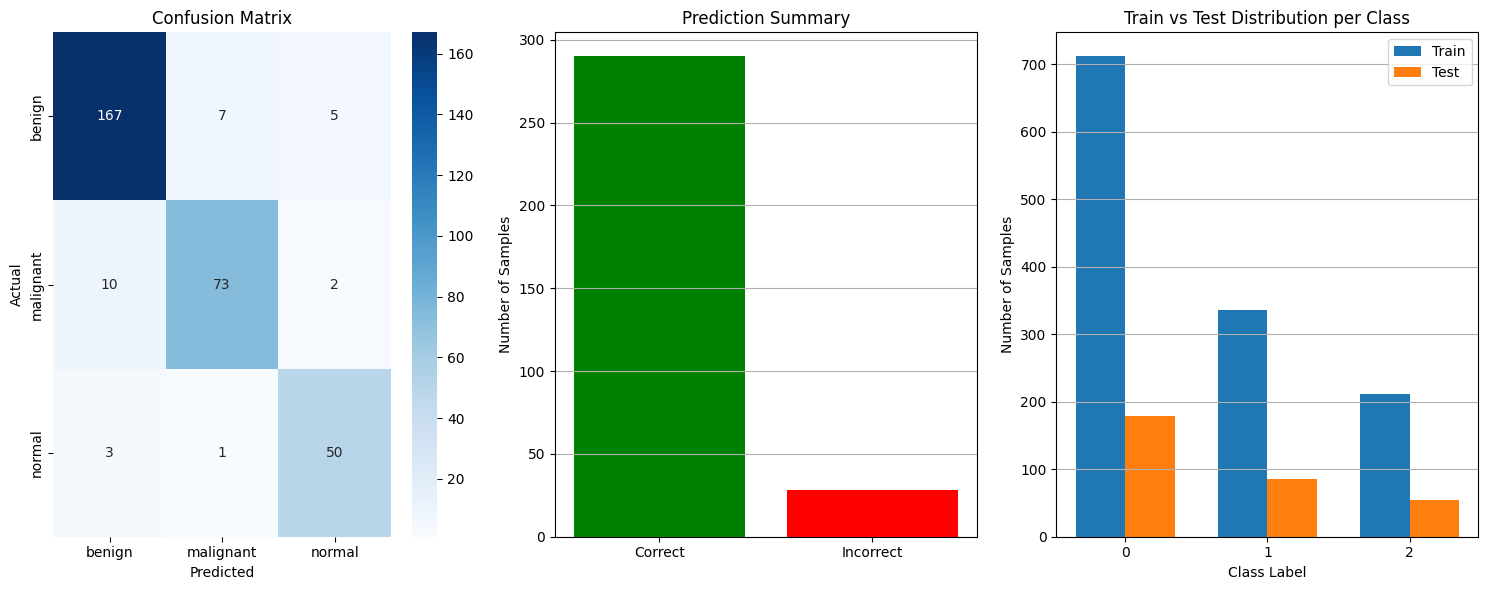

In [ ]:
# LightGBM pipeline with RMSprop and RandomizedSearchCV tuning
!pip install lightgbm

import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from PIL import Image, ImageFile, UnidentifiedImageError
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    f1_score, mean_squared_error, log_loss
)
import joblib
import h5py
from lightgbm import LGBMClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

ImageFile.LOAD_TRUNCATED_IMAGES = True
src_dataset_path = "/content/drive/MyDrive/Dataset_BUSI_with_GT"

def remove_corrupted_images(directory):
    count = 0
    for root, _, files in os.walk(directory):
        for fname in files:
            fpath = os.path.join(root, fname)
            try:
                with Image.open(fpath) as img:
                    img.load()
            except (OSError, UnidentifiedImageError):
                os.remove(fpath)
                count += 1
                print(f"Removed corrupted: {fpath}")
    print(f"[INFO] Total corrupted images removed: {count}")

def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.load()
        return True
    except Exception:
        return False

def prepare_dataset_structure(src_dir, dst_dir='dataset', split_ratio=0.2):
    classes = os.listdir(src_dir)
    total_images = 0
    for cls in classes:
        files = [f for f in Path(os.path.join(src_dir, cls)).glob('*.*') if is_valid_image(f)]
        if len(files) == 0:
            print(f"[WARNING] No valid images found for class '{cls}'. Skipping.")
            continue
        print(f"[INFO] Class: {cls} - Valid image count: {len(files)}")
        labels = [cls] * len(files)
        total_images += len(files)
        train_files, test_files = train_test_split(files, test_size=split_ratio, random_state=42, stratify=labels)
        for subset, file_list in zip(['train', 'test'], [train_files, test_files]):
            out_dir = Path(dst_dir) / subset / cls
            out_dir.mkdir(parents=True, exist_ok=True)
            for file in file_list:
                shutil.copy(file, out_dir / file.name)
    if total_images < 1200:
        raise ValueError(f"Jumlah total gambar valid hanya {total_images}, harus minimal 1200 untuk lanjut.")
    else:
        print(f"Jumlah total gambar valid: {total_images}")

if not os.path.exists("dataset/train"):
    prepare_dataset_structure(src_dataset_path)
    print("[INFO] Dataset has been split into train/test folders.")
    remove_corrupted_images("dataset/train")
    remove_corrupted_images("dataset/test")

image_size = (224, 224)
batch_size = 32
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.25,
    horizontal_flip=True,
    brightness_range=[0.7,1.3],
    fill_mode='reflect'
)

train_generator = datagen.flow_from_directory(
    'dataset/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

test_generator = datagen.flow_from_directory(
    'dataset/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

print("\n[INFO] Fine-tuning ResNet50 using RMSprop...")
input_tensor = Input(shape=(224, 224, 3))
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
for layer in base_model.layers[:-80]:
    layer.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(256, activation='relu', name="feature_output")(x)
x = Dropout(0.3)(x)
x = Dense(3, activation='softmax')(x)
fine_tune_model = Model(inputs=base_model.input, outputs=x)

fine_tune_model.compile(optimizer=RMSprop(learning_rate=1e-4),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
fine_tune_model.fit(train_generator, validation_data=test_generator, epochs=20,
                    callbacks=[reduce_lr])

feature_model = Model(inputs=fine_tune_model.input,
                      outputs=fine_tune_model.get_layer("feature_output").output)
feature_model.save("resnet50_feature_extractor.keras")
print("ResNet50 feature model saved as 'resnet50_feature_extractor.keras'")

def safe_extract_features(generator):
    features, labels = [], []
    for i in range(len(generator)):
        try:
            x_batch, y_batch = generator[i]
            f = feature_model.predict(x_batch, verbose=0)
            features.append(f)
            labels.extend(y_batch)
        except Exception as e:
            print(f"Skipping batch {i} due to error: {e}")
    return np.vstack(features), np.array(labels)

X_train_features, y_train = safe_extract_features(train_generator)
X_test_features, y_test = safe_extract_features(test_generator)

print("\n[INFO] Tuning LightGBM Classifier with RandomizedSearchCV...")
param_grid = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [6, 8, 10],
    'num_leaves': [30, 60, 100],
    'min_child_samples': [50, 100, 150],
}

search = RandomizedSearchCV(
    estimator=LGBMClassifier(class_weight='balanced'),
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    n_iter=10,
    cv=3,
    verbose=2,
    random_state=42
)

search.fit(X_train_features, y_train)
best_clf = search.best_estimator_

joblib.dump(best_clf, "lightgbm_classifier_optimized.pkl")
print("Optimized model saved as 'lightgbm_classifier_optimized.pkl'")

with h5py.File("lightgbm_model.h5", "w") as hf:
    hf.create_dataset("X_train_features", data=X_train_features)
    hf.create_dataset("y_train", data=y_train)
    hf.create_dataset("X_test_features", data=X_test_features)
    hf.create_dataset("y_test", data=y_test)
    hf.attrs['description'] = 'Fine-tuned ResNet50 features and labels for optimized LightGBM Classifier'

print("\n[INFO] Evaluating optimized model...")
y_pred = best_clf.predict(X_test_features)
y_proba = best_clf.predict_proba(X_test_features)

acc = accuracy_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred, average='macro')
mse = mean_squared_error(y_test, y_pred)
ll = log_loss(y_test, y_proba)

print(f"\nAccuracy: {acc:.2f}%")
print(f"Macro F1-score: {f1:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Log Loss: {ll:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(20, 6))

plt.subplot(1, 4, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=train_generator.class_indices, yticklabels=train_generator.class_indices)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.subplot(1, 4, 2)
correct = np.sum(y_test == y_pred)
incorrect = len(y_test) - correct
plt.bar(['Correct', 'Incorrect'], [correct, incorrect], color=['green', 'red'])
plt.title('Prediction Summary')
plt.ylabel('Number of Samples')
plt.grid(axis='y')

plt.subplot(1, 4, 3)
labels = np.unique(np.concatenate([y_train, y_test]))
train_counts = [np.sum(y_train == label) for label in labels]
test_counts = [np.sum(y_test == label) for label in labels]
bar_width = 0.35
index = np.arange(len(labels))
plt.bar(index, train_counts, bar_width, label='Train')
plt.bar(index + bar_width, test_counts, bar_width, label='Test')
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Train vs Test Distribution per Class')
plt.xticks(index + bar_width / 2, [str(int(l)) for l in labels])
plt.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.show()